## Imports

In [ ]:
from gensim.test.utils import common_corpus, common_dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models.coherencemodel import CoherenceModel
import sklearn
import numpy as np
import nltk
from nltk import bigrams
from nltk import trigrams
from nltk import ngrams
from nltk.tokenize import RegexpTokenizer
import itertools
import pandas as pd
import math
import itertools
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import os
import urllib.request
import matplotlib.pyplot as plt
from scipy import spatial
from sklearn.manifold import TSNE
import numpy as np
from scipy import spatial

urllib.request.urlretrieve('https://nlp.stanford.edu/data/glove.6B.zip','glove.6B.zip')

!unzip "/content/glove.6B.zip" -d "/content/"

embed_dict = {}
with open('/content/glove.6B.200d.txt','r') as f:
  for line in f:
    values = line.split()
    word = values[0]
    vector = np.asarray(values[1:],'float32')
    embed_dict[word]=vector

Archive:  /content/glove.6B.zip
  inflating: /content/glove.6B.50d.txt  
  inflating: /content/glove.6B.100d.txt  
  inflating: /content/glove.6B.200d.txt  
  inflating: /content/glove.6B.300d.txt  


In [ ]:
%%capture

!pip install bertopic
!pip install octis
!pip uninstall gensim -y
!pip install git+https://github.com/RaRe-Technologies/gensim.git@refs/pull/3172/merge

from google.colab import drive
drive.mount("/content/drive", force_remount=True)
import os
os.chdir("/content/drive/My Drive/Evaluation/")

from octis.dataset.dataset import Dataset
from data import DataLoader
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import random 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sentence_transformers import SentenceTransformer

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
import umap
import hdbscan
from bertopic import BERTopic
import tensorflow_hub

In [ ]:
import numpy as np
import pandas as pd
import csv
import random

from sklearn.datasets import fetch_20newsgroups

## 20NG loading and modification for dynamic topic modeling

In [ ]:
newsgroups = fetch_20newsgroups(subset='all')

df = pd.DataFrame(newsgroups.data, columns=['text'])
df['categories'] = [newsgroups.target_names[index] for index in newsgroups.target]
df.head()

text                categories
0  From: Mamatha Devineni Ratnam <mr47+@andrew.cm...          rec.sport.hockey
1  From: mblawson@midway.ecn.uoknor.edu (Matthew ...  comp.sys.ibm.pc.hardware
2  From: hilmi-er@dsv.su.se (Hilmi Eren)\nSubject...     talk.politics.mideast
3  From: guyd@austin.ibm.com (Guy Dawson)\nSubjec...  comp.sys.ibm.pc.hardware
4  From: Alexander Samuel McDiarmid <am2o+@andrew...     comp.sys.mac.hardware

In [ ]:
# REAL
data = fetch_20newsgroups(subset='all')['data']
target = fetch_20newsgroups(subset='all')['target']
names = fetch_20newsgroups(subset='all')['target_names']


# We create dataframe
df = pd.DataFrame(columns = ["text","topic"])
df['text'] = data
df['topic'] = target
df.dropna(axis=0)

# We create timestamps in a clever way

time = []

len7 = len(df[df["topic"] == 7])
k7 = 0
len9 = len(df[df["topic"] == 9])
k9 = 0
len10 = len(df[df["topic"] == 10])
k10 = 0
len8 = len(df[df["topic"] == 8])
k8 = 0
len11 = len(df[df["topic"] == 11])
k11 = 0
len13 = len(df[df["topic"] == 13])
k13 = 0
len12 = len(df[df["topic"] == 12])
k12 = 0
len14 = len(df[df["topic"] == 14])
k14 = 0

for i in target :
  if i==19 or i==16 or i==17 or i==6 or i==2 or i==14 :
    r = random.choice([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14])
    time.append(r)
  else :
    if i==0 :
      r = random.choice([2,3])
      time.append(r)
    else :
      if i==5 or i==4 or i==3 or i==1 :
        r = random.choice([13,14])
        time.append(r)
      else :
        if i==18 :
          time.append(12)
        elif i==7 :
          if k7 <=20 :
            time.append(1)
            k7 +=1
          elif (k7 > 20) & (k7 <= 80) : 
            time.append(2)
            k7 +=1
          elif (k7 > 80) & (k7 <= 180) : 
            k7 +=1
            time.append(3)
          elif (k7 > 180) & (k7 <= 380) : 
            k7 +=1
            time.append(4)
          elif (k7 > 380) & (k7 <= 680) : 
            k7 +=1
            time.append(5)
          elif (k7 > 680) & (k7 <= 800) : 
            k7 +=1
            time.append(6)
          elif (k7 > 800) & (k7 <= 890) : 
            k7 +=1
            time.append(7)
          elif (k7 > 890) : 
            k7 +=1
            time.append(8)
        elif i==8 :
          if k8 <= 100 : 
            time.append(8)
            k8 +=1
          elif (k8 > 100) & (k8 <= 270) : 
            k8 +=1
            time.append(9)
          elif (k8 > 270) & (k8 <= 530) : 
            k8 +=1
            time.append(10)
          elif (k8 > 530) & (k8 <= 790) : 
            k8 +=1
            time.append(11)
          elif (k8 > 790) & (k8 <= 890) : 
            k8 +=1
            time.append(12)
          elif (k8 > 890) : 
            k8 +=1
            time.append(13)
        elif i==11 :
          if k11 <= 40 : 
            time.append(1)
            k11 +=1
          elif (k11 > 40) & (k11 <= 110) : 
            k11 +=1
            time.append(2)
          elif (k11 > 110) & (k11 <= 240) : 
            k11 +=1
            time.append(3)
          elif (k11 > 240) & (k11 <= 400) : 
            k11 +=1
            time.append(4)
          elif (k11 > 400) & (k11 <= 600) : 
            k11 +=1
            time.append(5)
          elif (k11 > 600) & (k11 <= 730) : 
            k11 +=1
            time.append(6)
          elif (k11 > 730) & (k11 <= 850) : 
            k11 +=1
            time.append(7)
          elif (k11 > 850) : 
            k11 +=1
            time.append(8)
        elif i==13 :
          if k13 <= 90 : 
            time.append(2)
            k13 +=1
          elif (k13 > 90) & (k13 <= 210) : 
            k13 +=1
            time.append(3)
          elif (k13 > 210) & (k13 <= 360) : 
            k13 +=1
            time.append(4)
          elif (k13 > 360) & (k13 <= 500) : 
            k13 +=1
            time.append(5)
          elif (k13 > 500) & (k13 <= 730) : 
            k13 +=1
            time.append(6)
          elif (k13 > 730) & (k13 <= 880) : 
            k13 +=1
            time.append(6)
          elif (k13 > 880) : 
            k13 +=1
            time.append(7)
        elif i==12 :
          if k12 <= 90 : 
            time.append(2)
            k12 +=1
          elif (k12 > 80) & (k12 <= 210) : 
            k12 +=1
            time.append(3)
          elif (k12 > 210) & (k12 <= 350) : 
            k12 +=1
            time.append(4)
          elif (k12 > 350) & (k12 <= 510) : 
            k12 +=1
            time.append(5)
          elif (k12 > 510) & (k12 <= 670) : 
            k12 +=1
            time.append(6)
          elif (k12 > 670) & (k12 <= 800) : 
            k12 +=1
            time.append(6)
          elif (k12 > 800) & (k12 <= 880) : 
            k12 +=1
            time.append(7)
          elif (k12 > 880) & (k12 <= 940) : 
            k12 +=1
            time.append(8)
          elif (k12 > 940) : 
            k12 +=1
            time.append(9)
        elif i==9 :
          if k9 <= 60 : 
            time.append(3)
            k9 +=1
          elif (k9 > 60) & (k9 <= 150) : 
            k9 +=1
            time.append(4)
          elif (k9 > 150) & (k9 <= 260) : 
            k9 +=1
            time.append(5)
          elif (k9 > 260) & (k9 <= 430) : 
            k9 +=1
            time.append(6)
          elif (k9 > 430) & (k9 <= 630) : 
            k9 +=1
            time.append(7)
          elif (k9 > 630) & (k9 <= 750) : 
            k9 +=1
            time.append(8)
          elif (k9 > 750) & (k9 <= 840) : 
            k9 +=1
            time.append(9)
          elif (k9 > 840) & (k9 <= 920) : 
            k9 +=1
            time.append(10)
          elif (k9 > 920) : 
            k9 +=1
            time.append(11)

        elif i==10 :
          if k10 <= 70 : 
            time.append(8)
            k10 +=1
          elif (k10 > 70) & (k10 <= 190) : 
            k10 +=1
            time.append(9)
          elif (k10 > 190) & (k10 <= 250) : 
            k10 +=1
            time.append(10)
          elif (k10 > 250) & (k10 <= 440) : 
            k10 +=1
            time.append(11)
          elif (k10 > 440) & (k10 <= 610) : 
            k10 +=1
            time.append(12)
          elif (k10 > 610) & (k10 <= 790) : 
            k10 +=1
            time.append(13)
          elif (k10 > 790) : 
            k10 +=1
            time.append(14)

        elif i==14 :
          if k14 <= 120 : 
            time.append(5)
            k14 +=1
          elif (k14 > 120) & (k14 <= 270) : 
            k14 +=1
            time.append(6)
          elif (k14 > 270) & (k14 <= 490) : 
            k14 +=1
            time.append(7)
          elif (k14 > 490) & (k14 <= 700) : 
            k14 +=1
            time.append(8)
          elif (k14 > 700) & (k14 <= 870) : 
            k14 +=1
            time.append(9)
          elif (k14 > 870) : 
            k14 +=1
            time.append(10)
        elif i==15 :
          r = random.choice([11,12,13,14])
          time.append(r)


df['timestamp'] = time

TIME = time

#Our model

In [ ]:
# We load our document embedder model
embedding_model = tensorflow_hub.load("https://tfhub.dev/google/universal-sentence-encoder/4") # USE is our document embedding model !
#topic_model = BERTopic(embedding_model=embedding_model)


timestamps = df["timestamp"].values.tolist()
true_topic = df["topic"].values.tolist()


####### c-TF-IDF #######
def c_tf_idf(documents, m, ngram_range=(1, 1)):
  count = CountVectorizer(ngram_range=ngram_range, stop_words="english").fit(documents)
  t = count.transform(documents).toarray()
  w = t.sum(axis=1)
  tf = np.divide(t.T, w)
  sum_t = t.sum(axis=0)
  idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
  tf_idf = np.multiply(tf, idf)
  return tf_idf, count

def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
  '''
  This function allows us to extract the top n words in a topic
  '''
  words = count.get_feature_names()
  labels = list(docs_per_topic.Topic)
  tf_idf_transposed = tf_idf.T
  indices = tf_idf_transposed.argsort()[:, -n:]
  top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
  return top_n_words

def extract_topic_sizes(df):
  topic_sizes = (df.groupby(['Topic'])
                      .Doc
                      .count()
                      .reset_index()
                      .rename({"Topic": "Topic", "Doc": "Size"}, axis='columns')
                      .sort_values("Size", ascending=False))
  return topic_sizes

We perform dynamic topic modeling on the new version of 20NG and display the topic detected by our model against the ground-truth topics

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:188: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:89: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_war

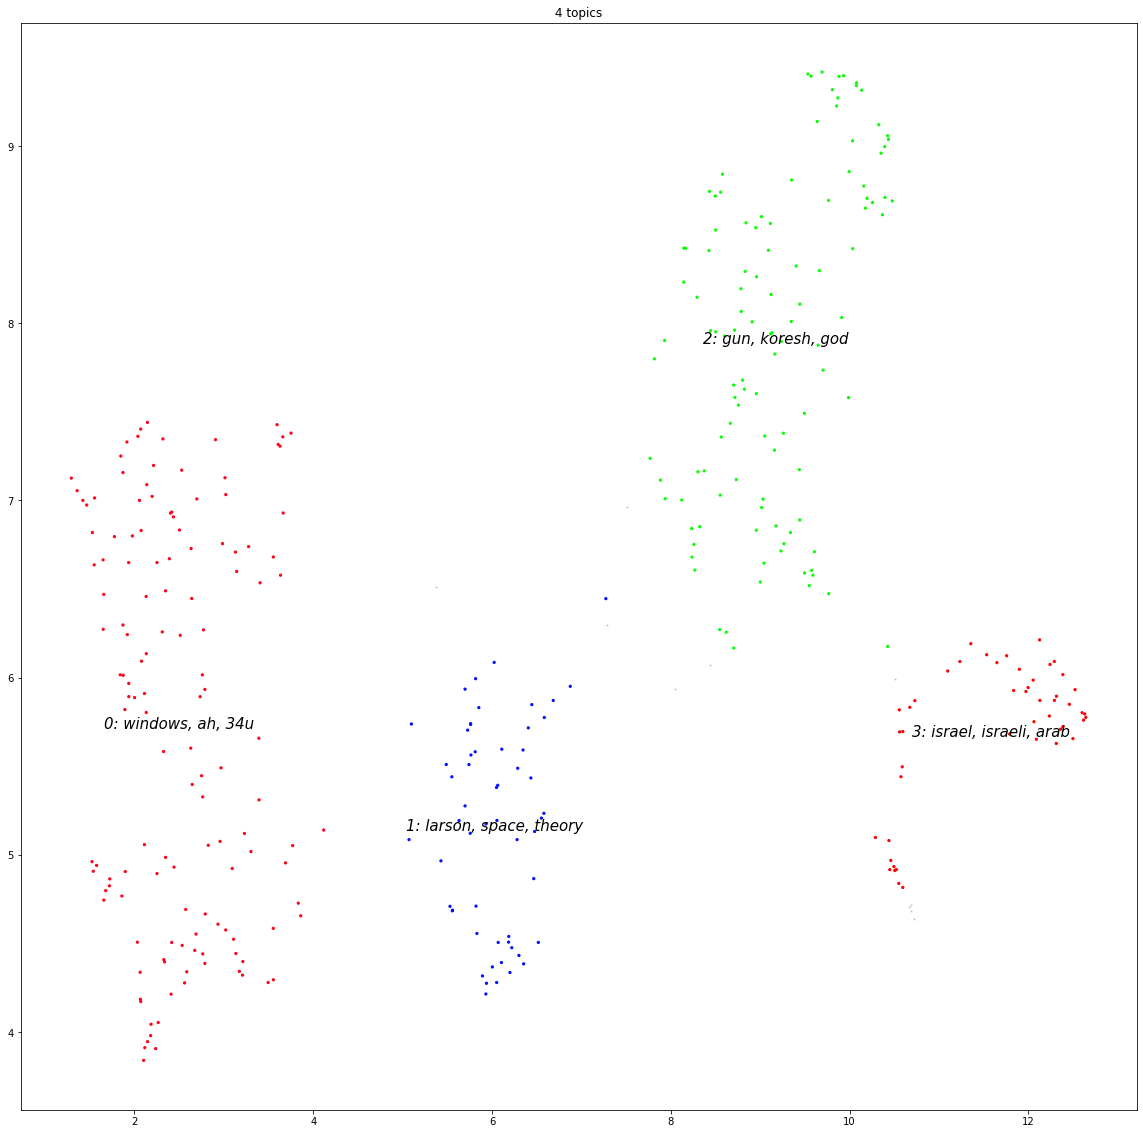

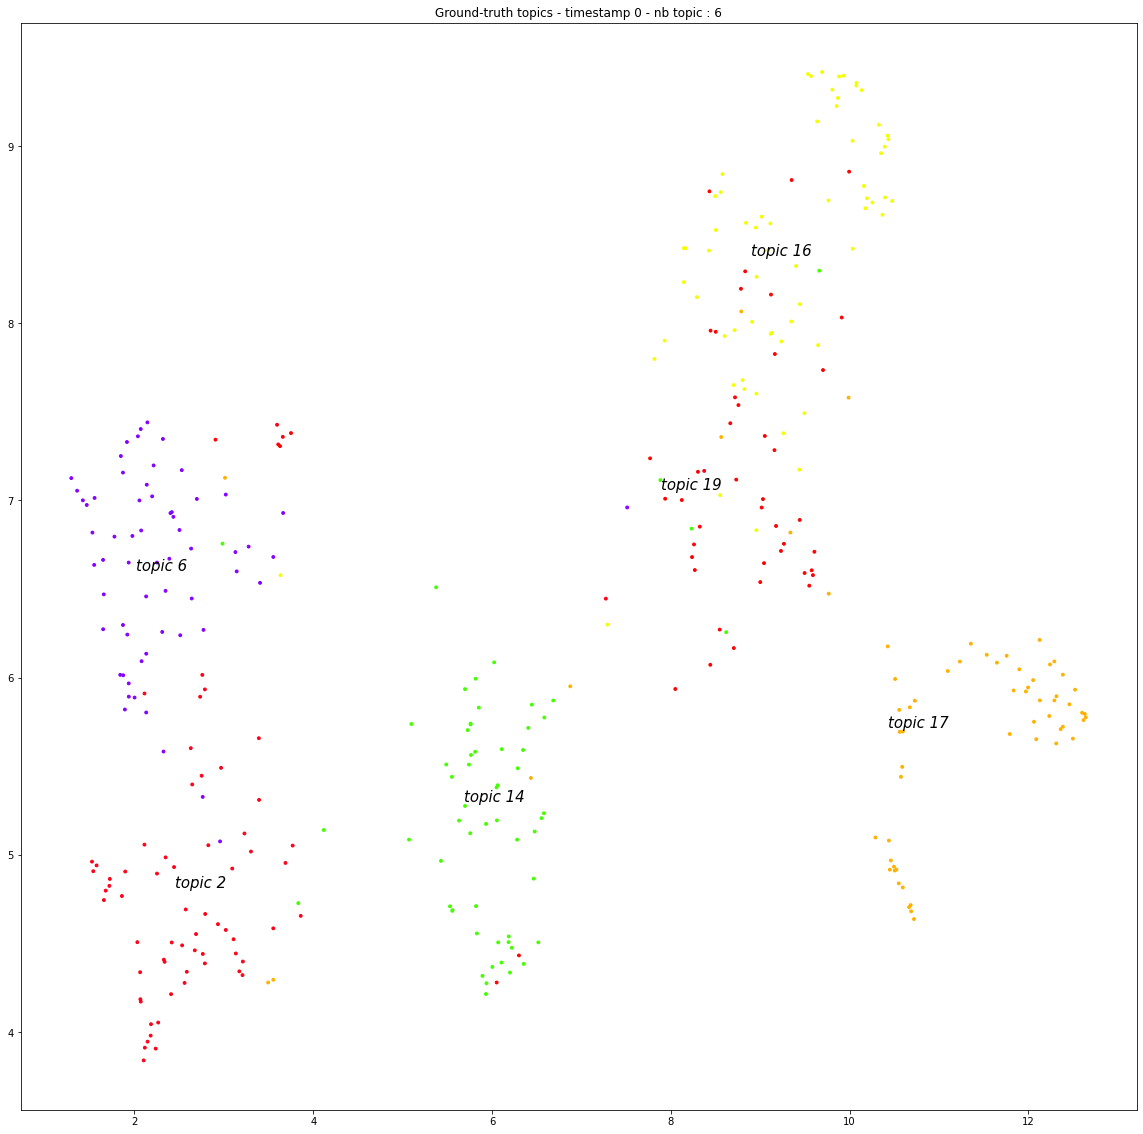

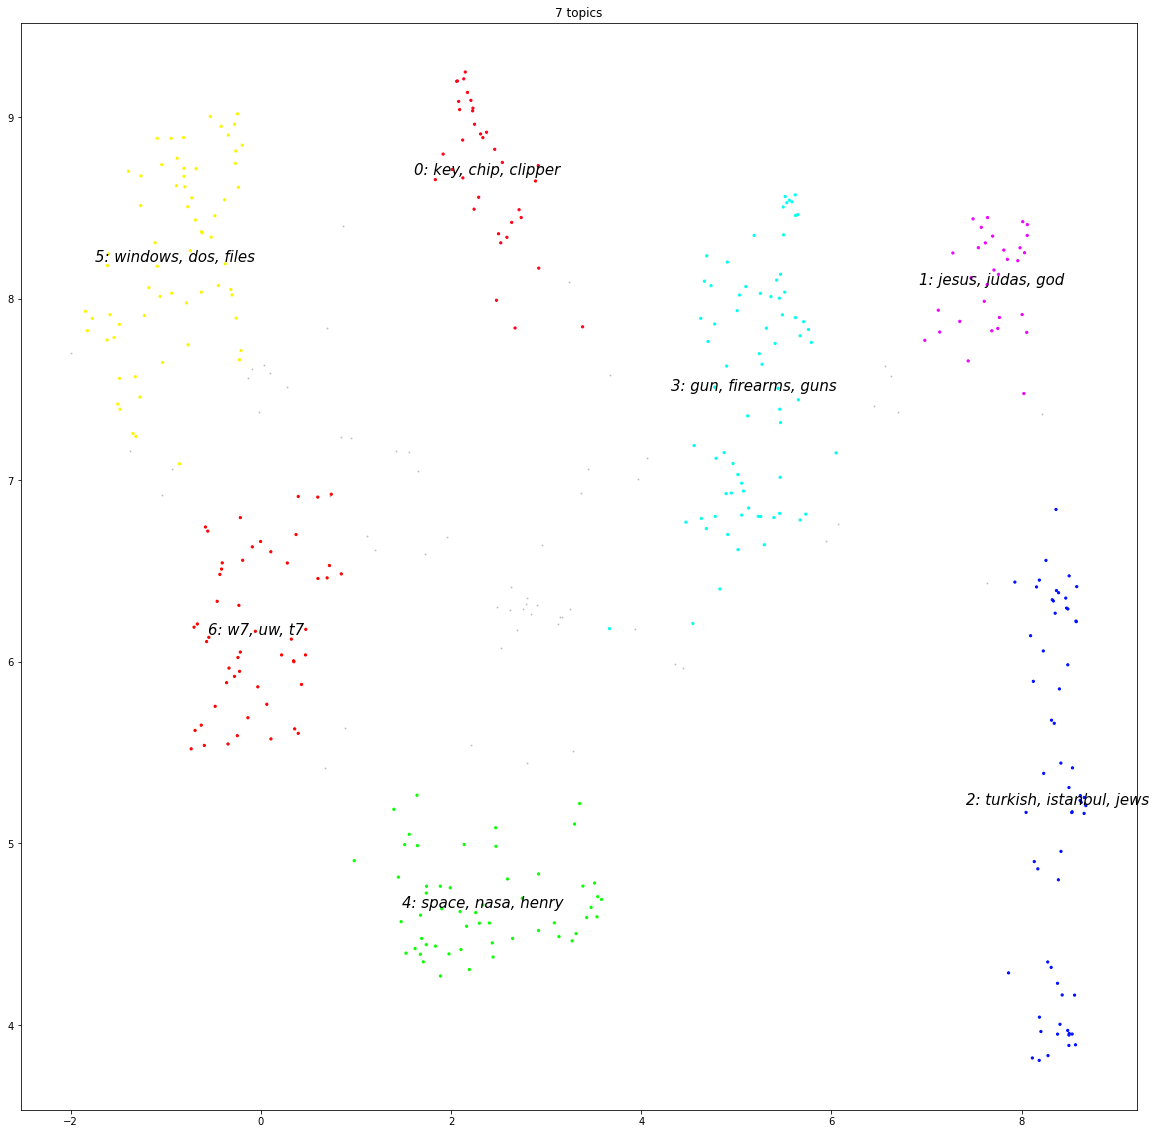

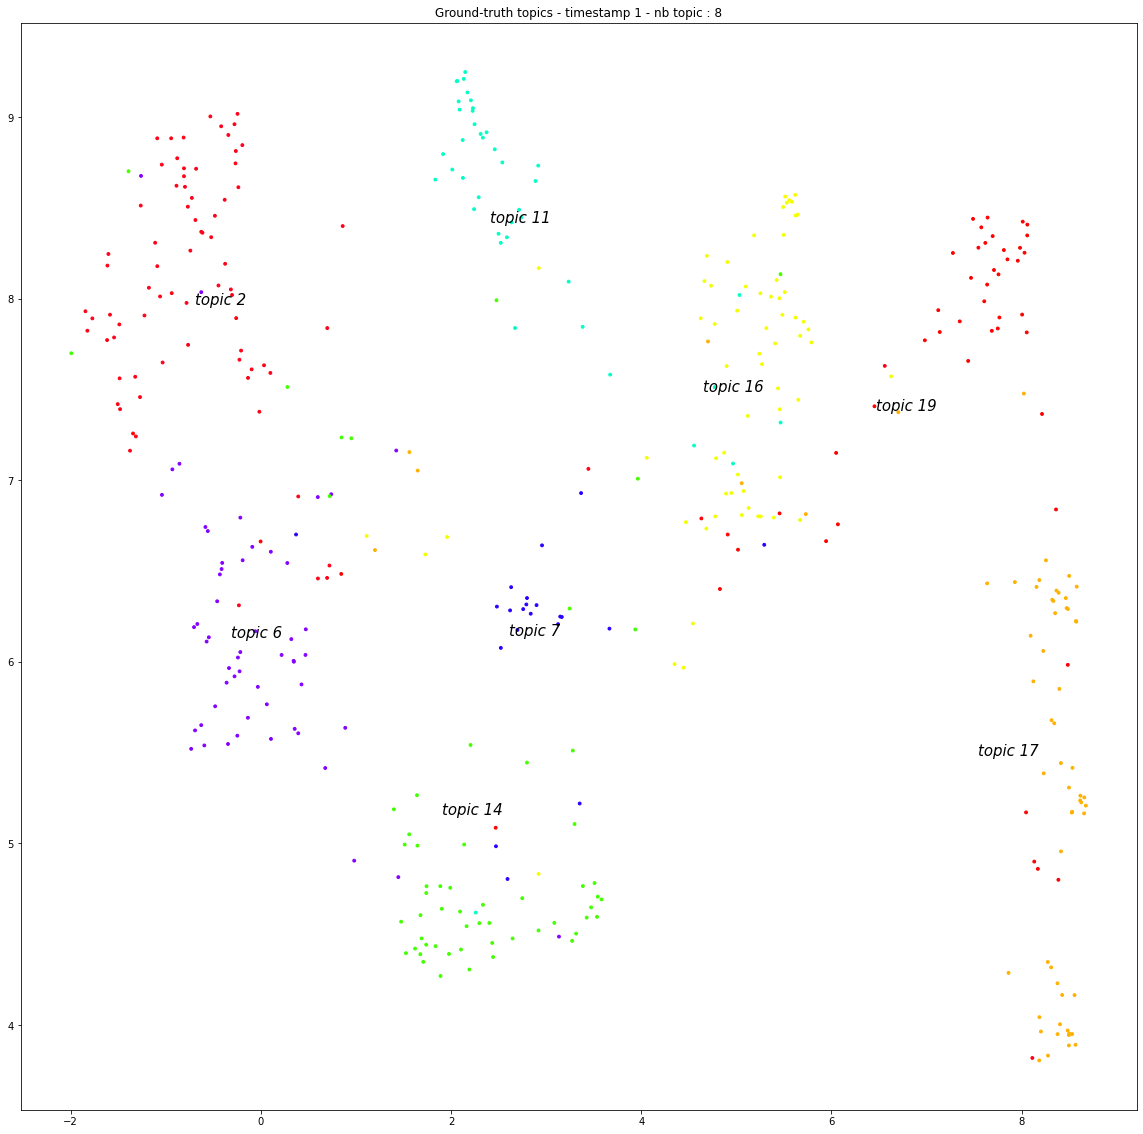

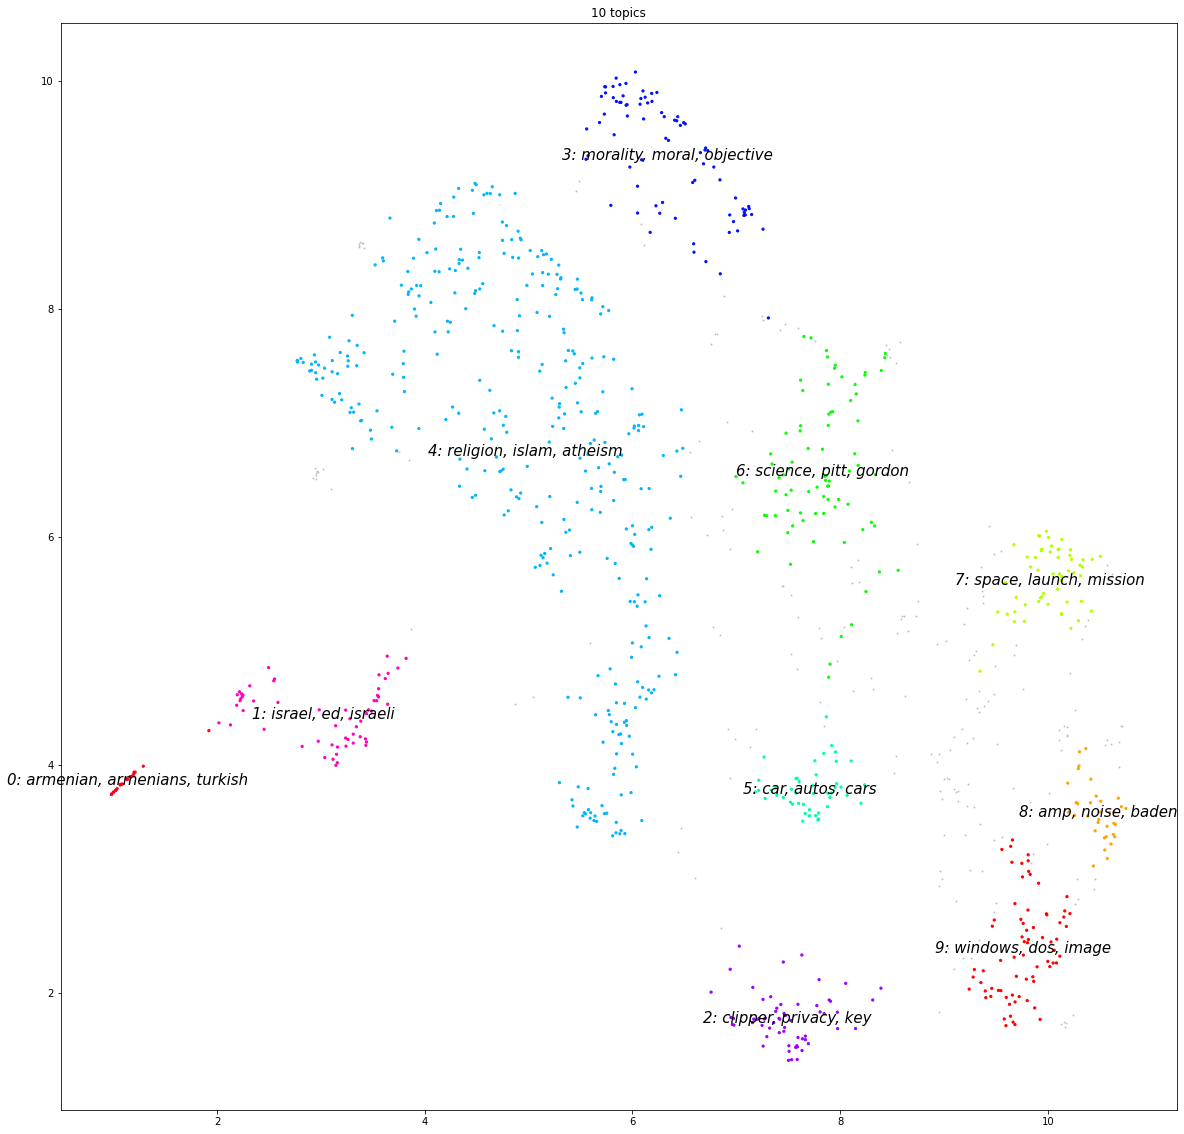

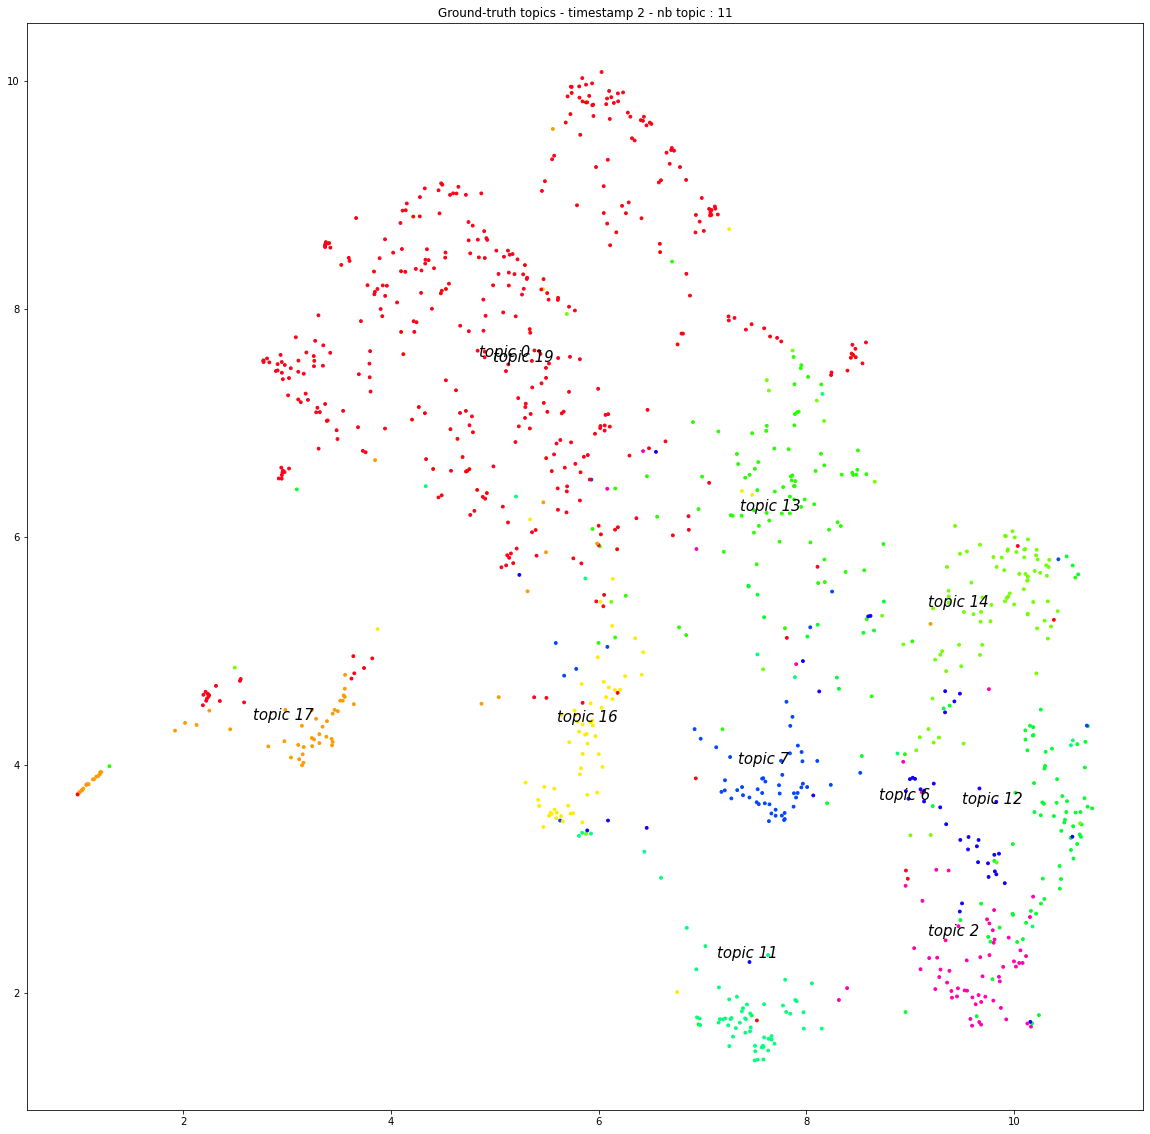

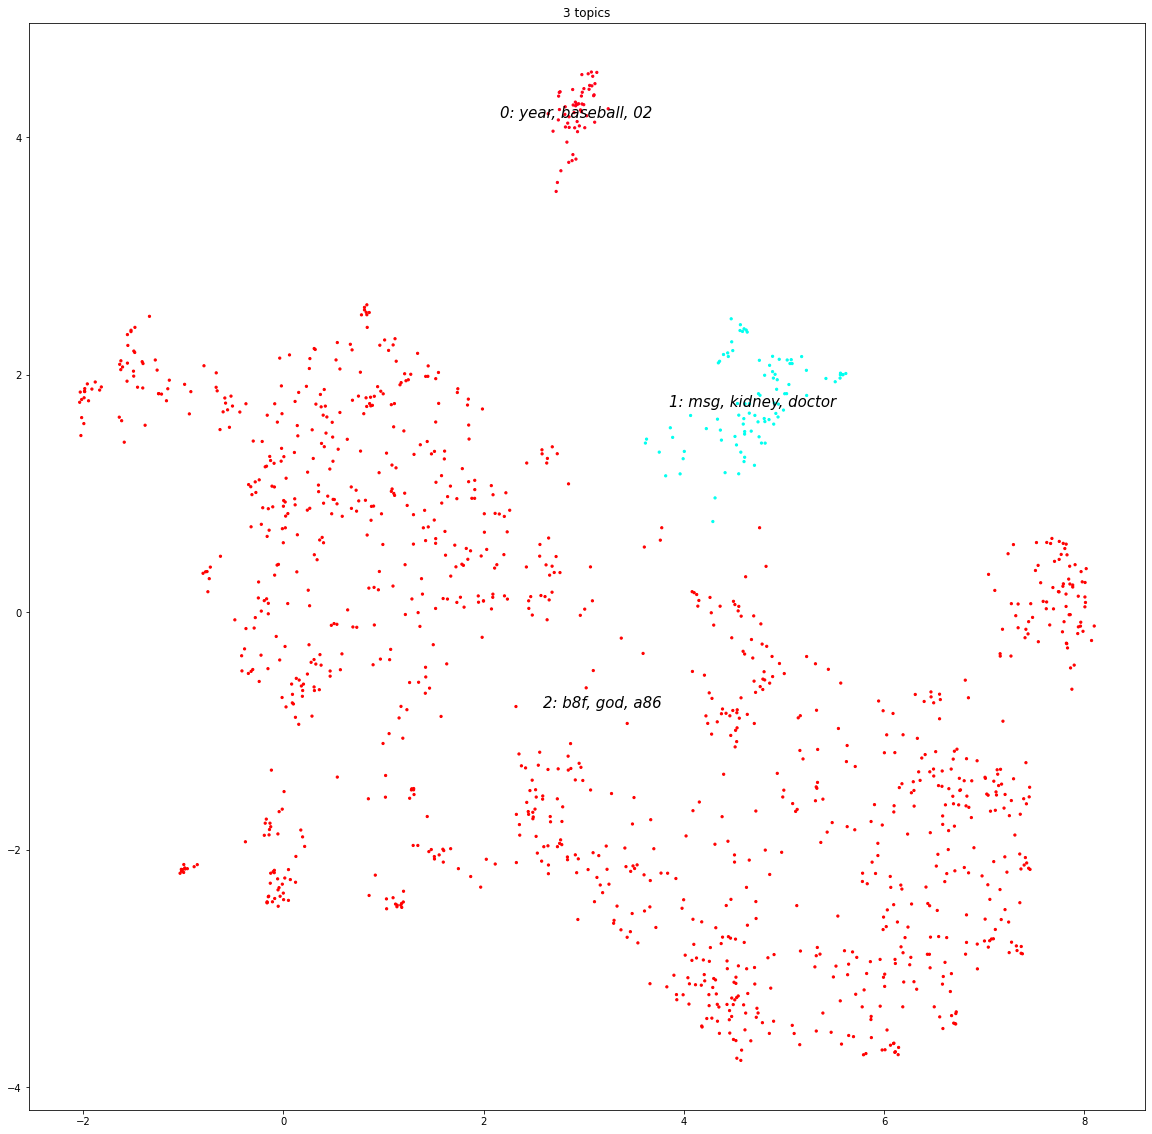

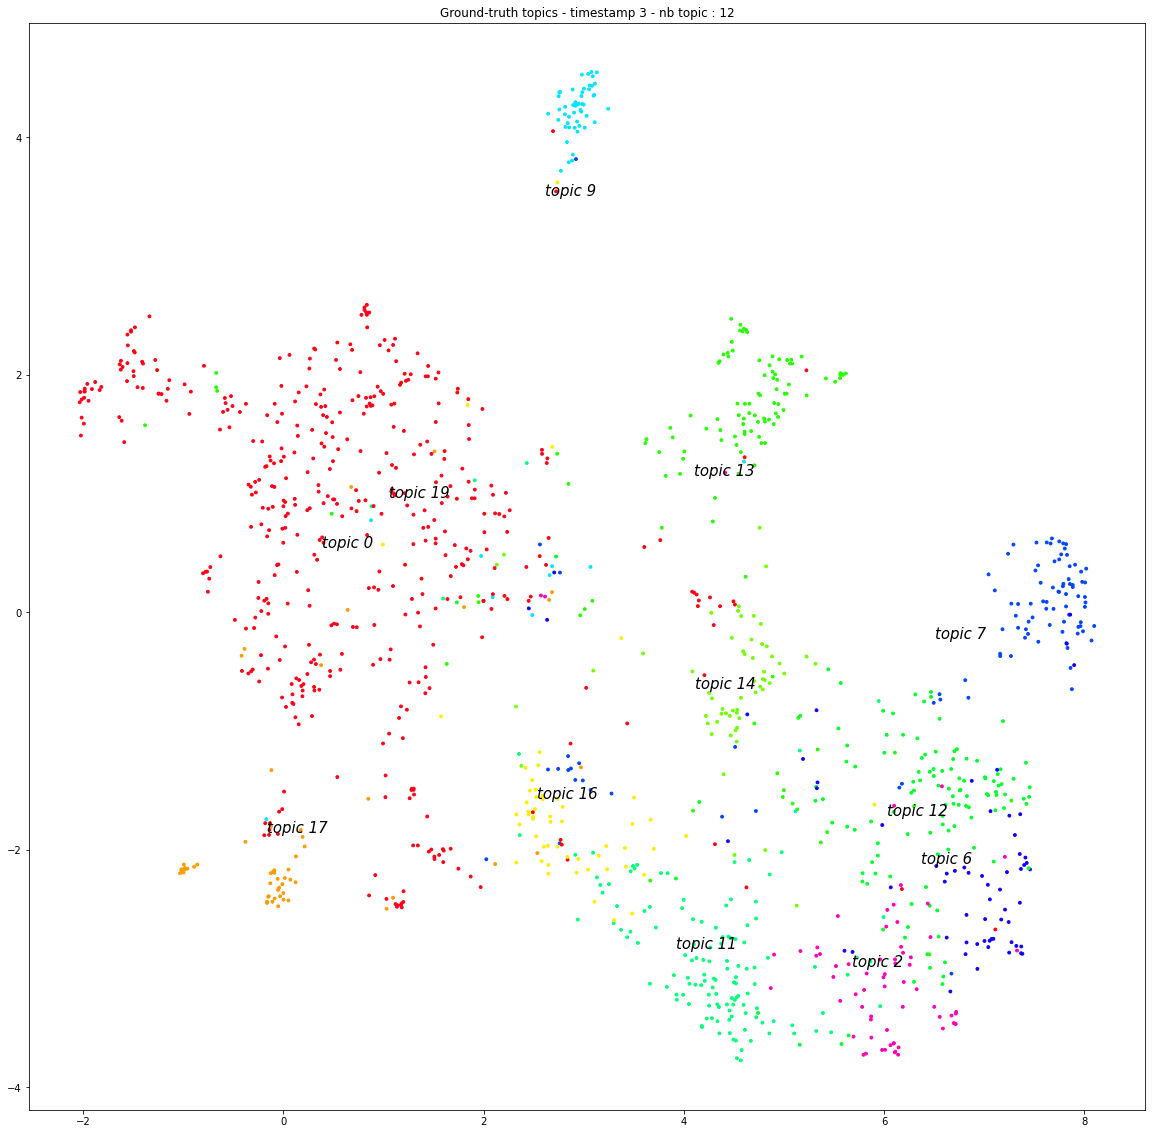

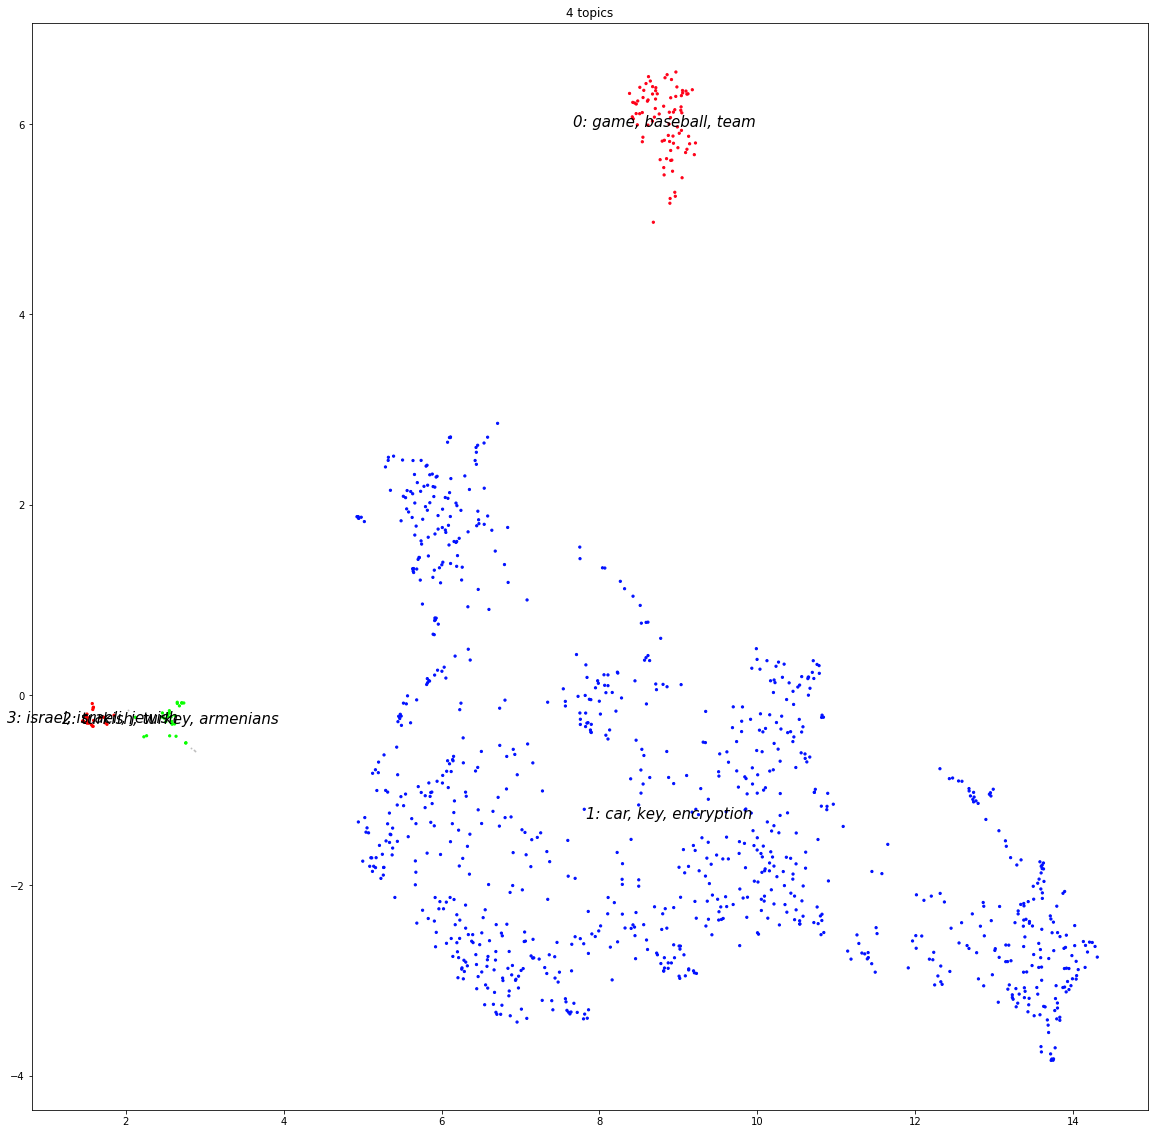

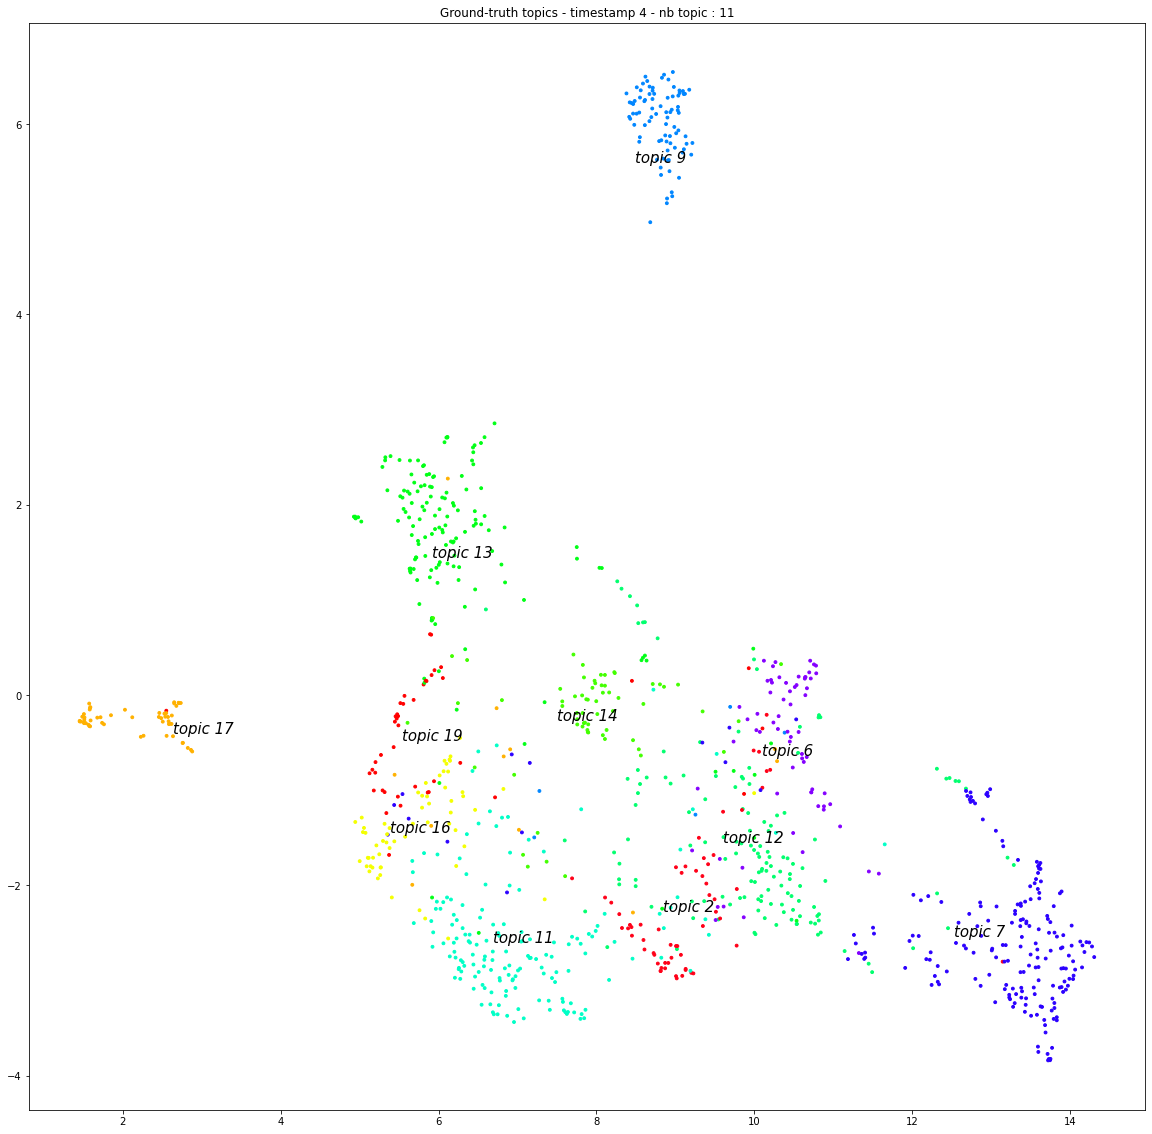

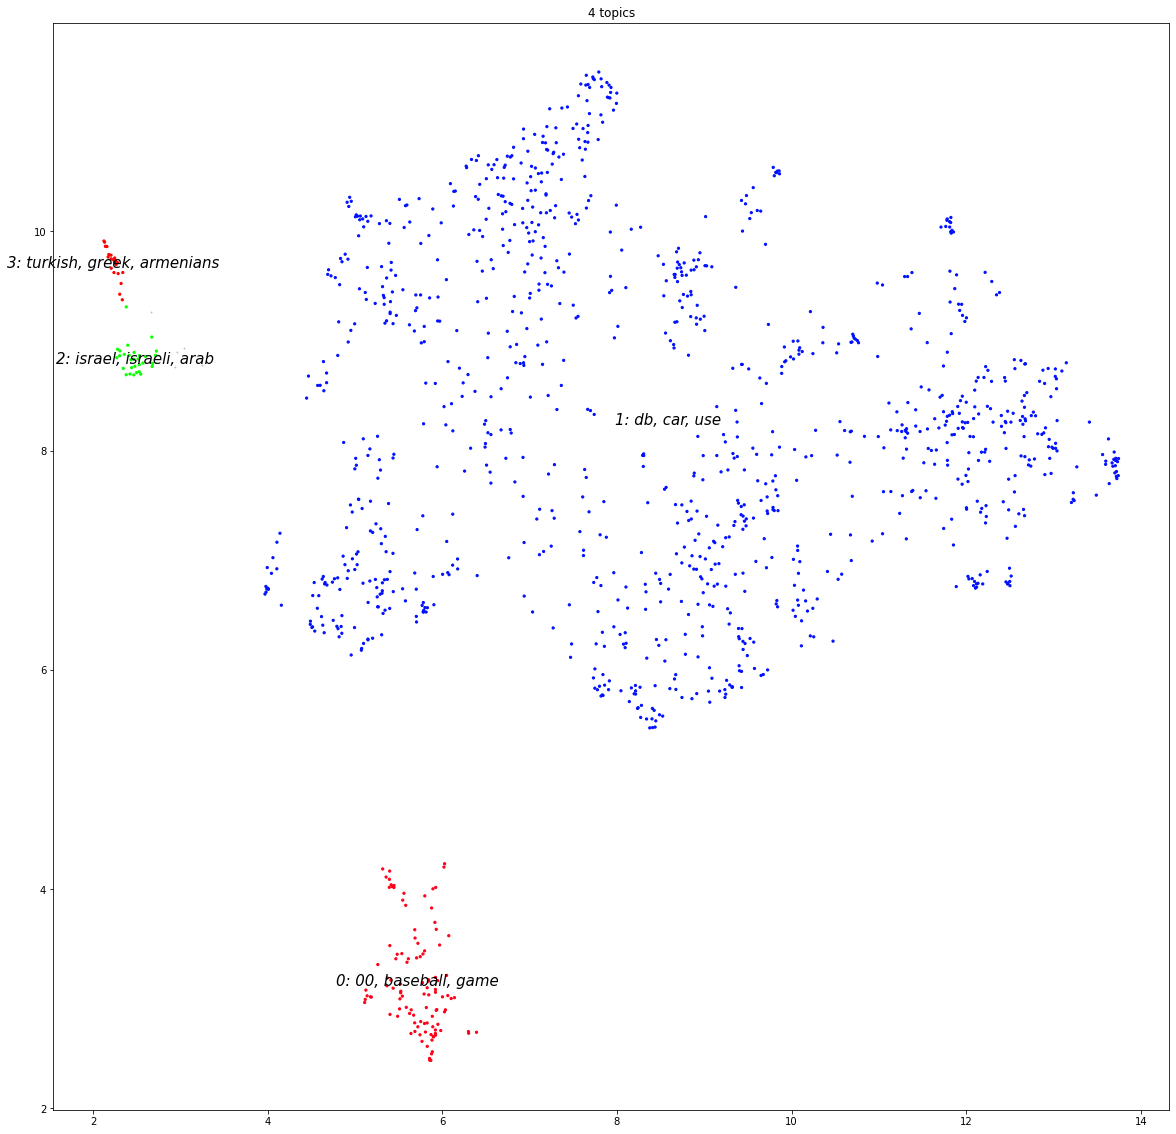

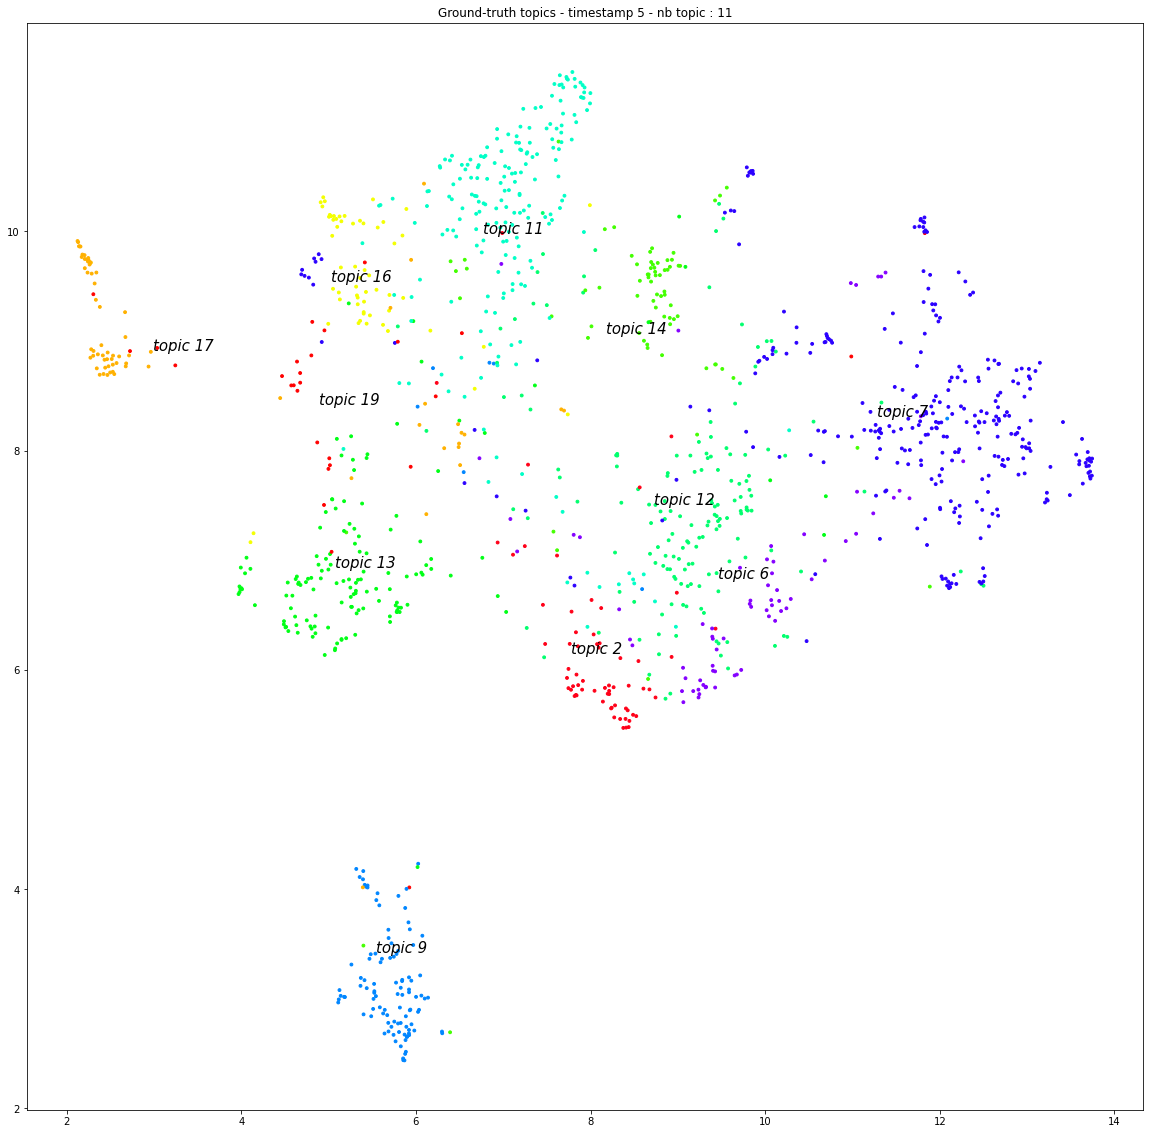

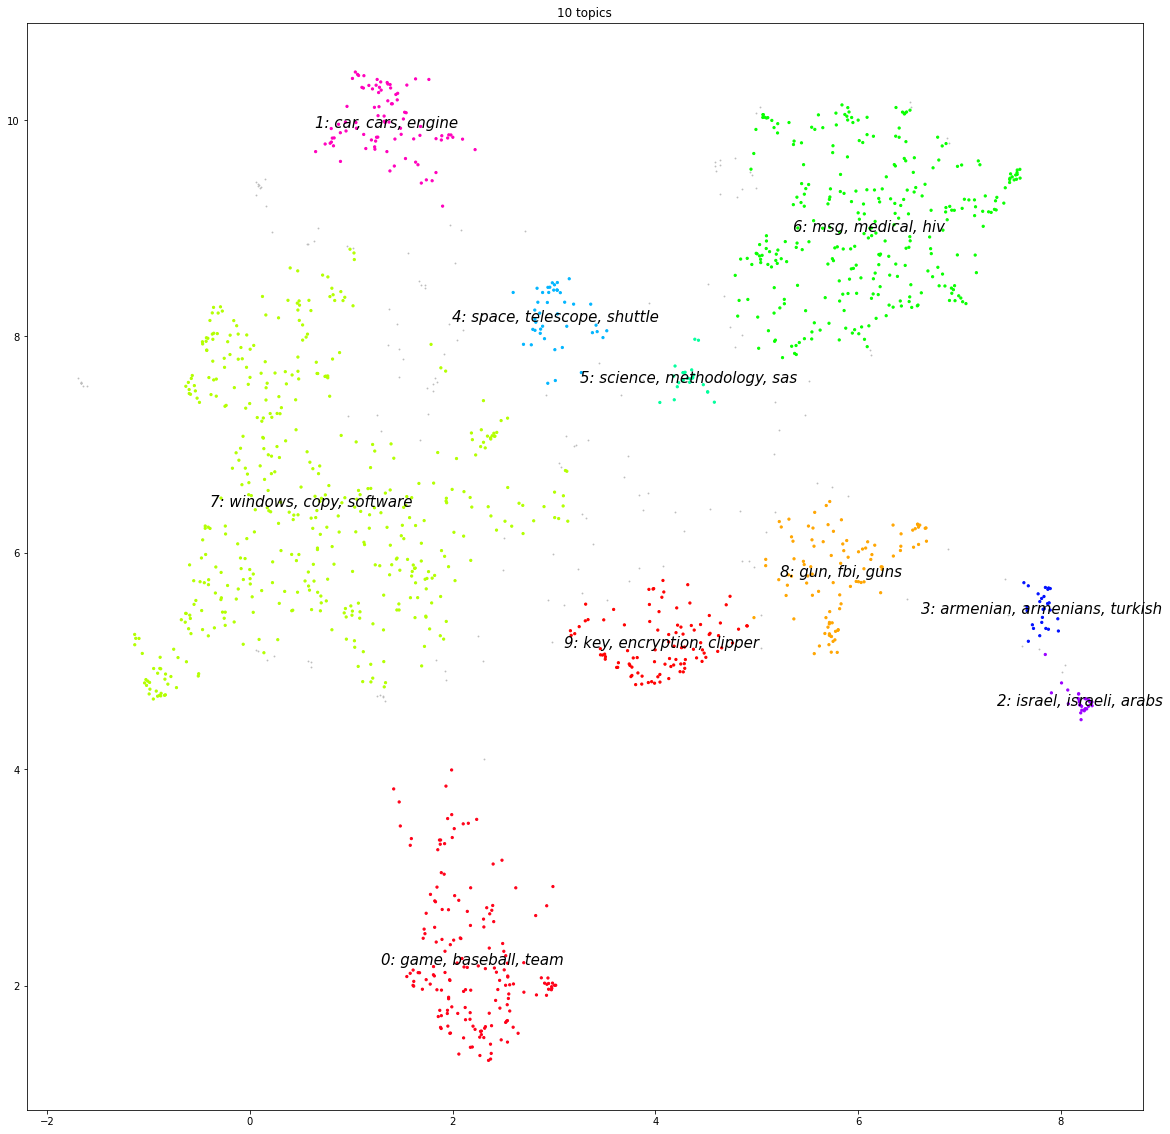

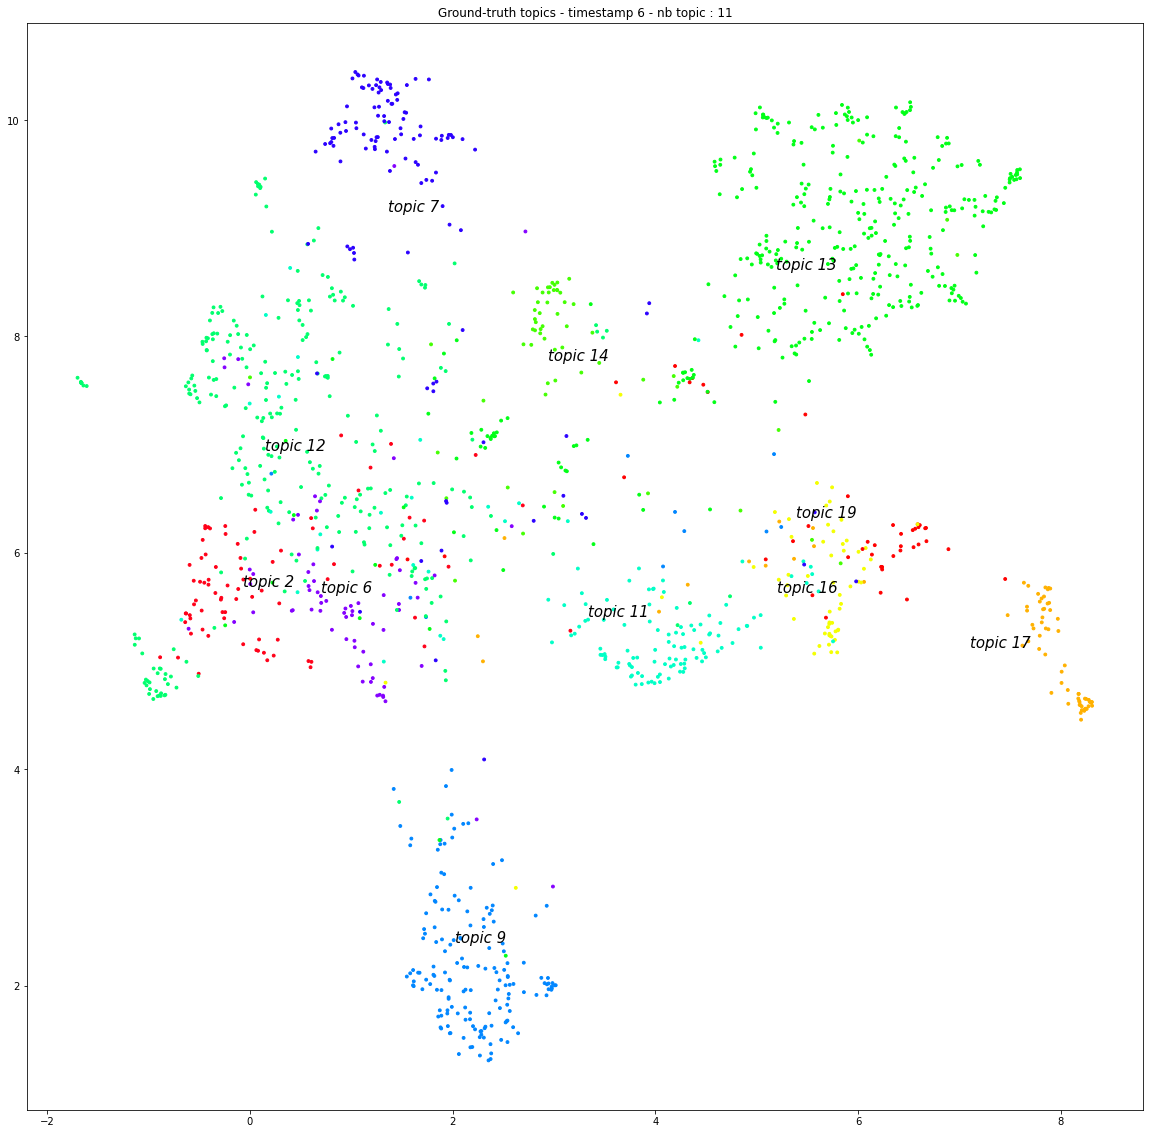

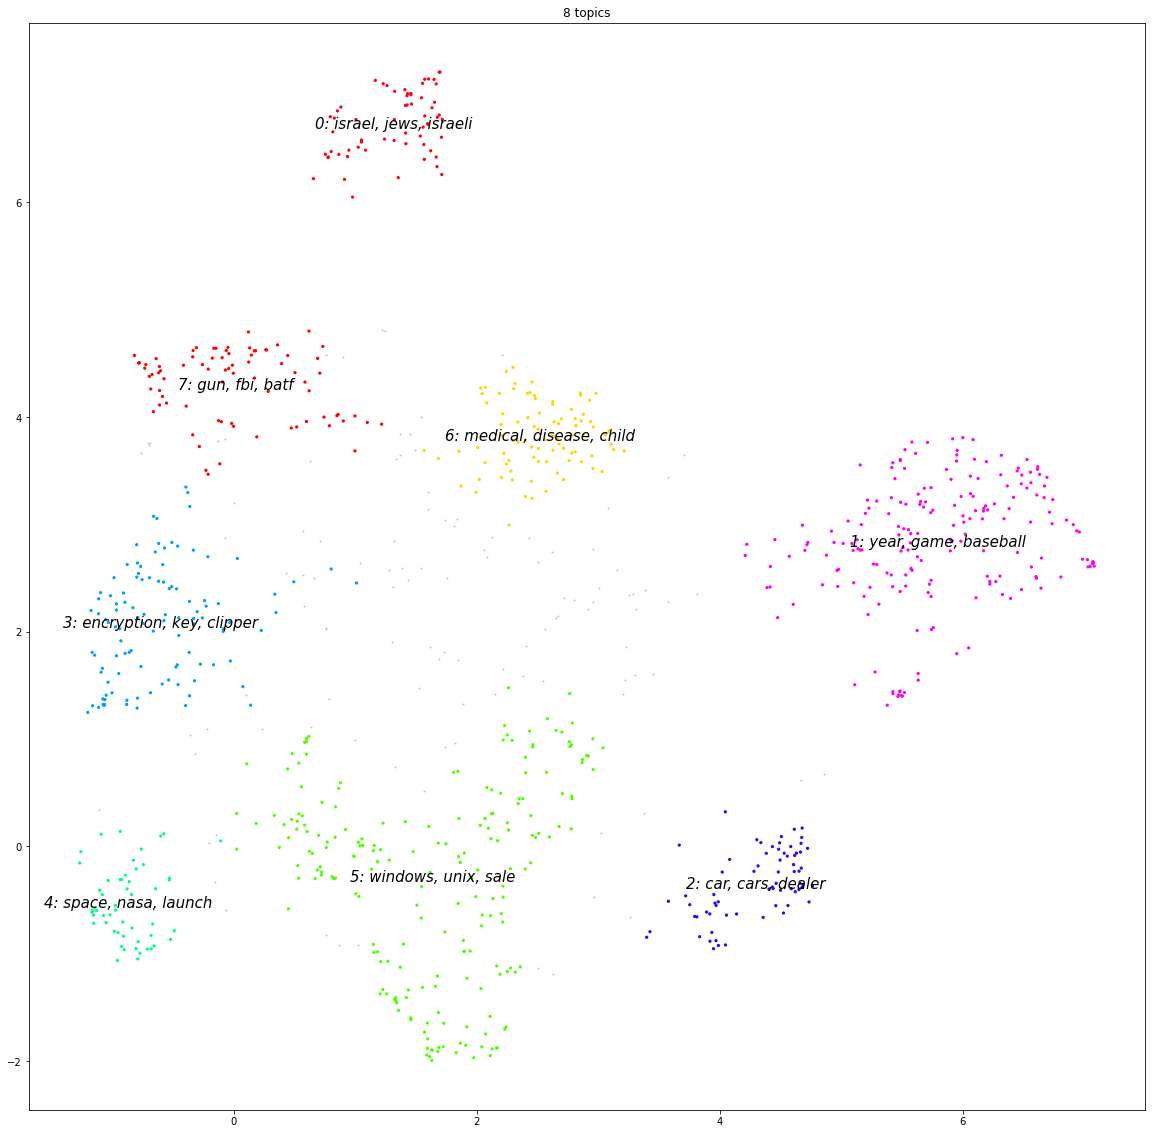

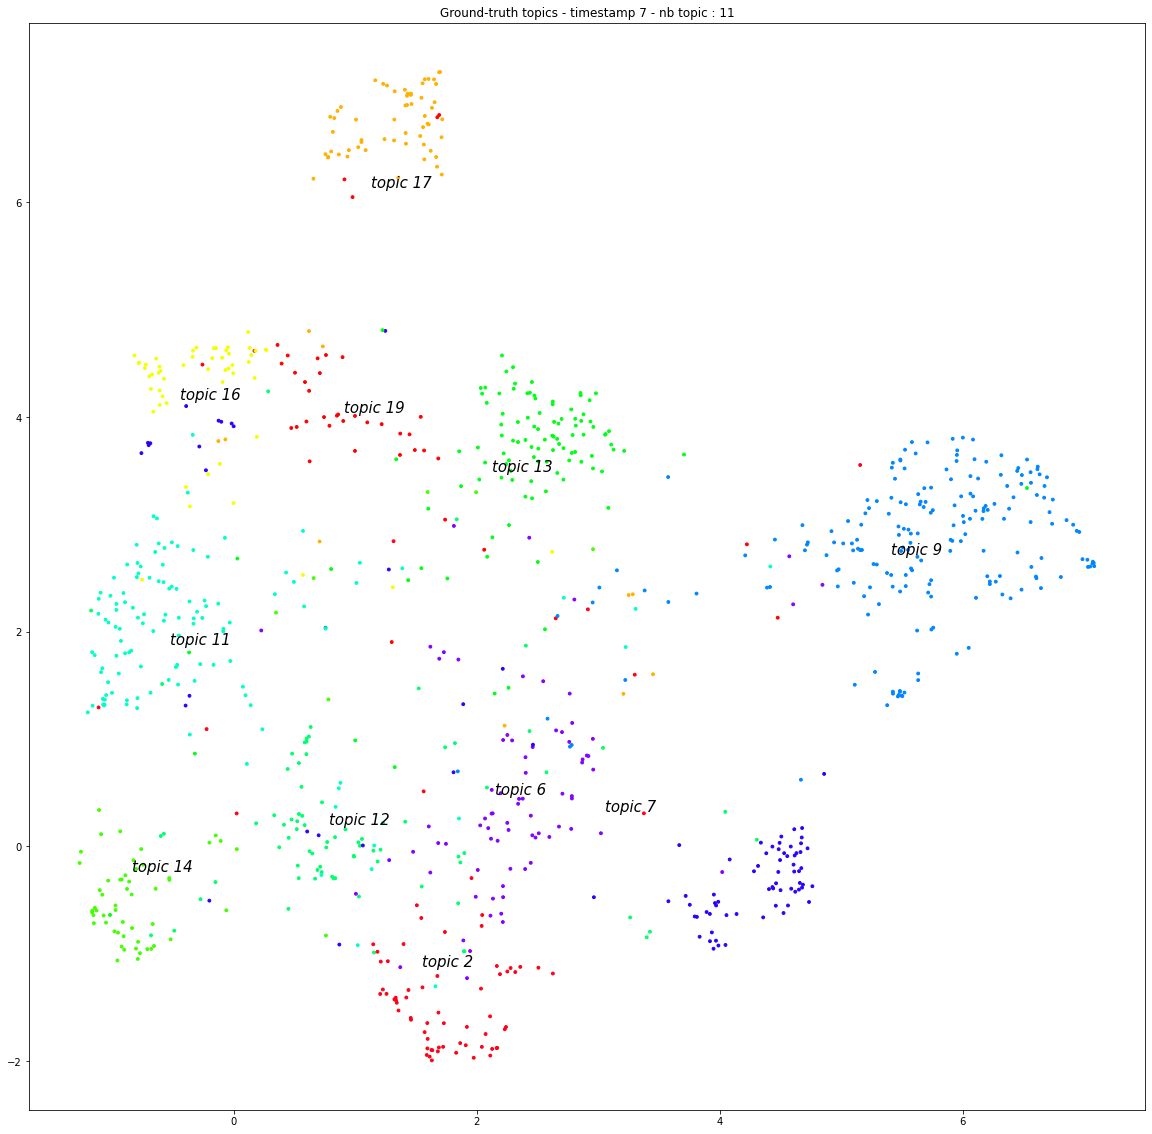

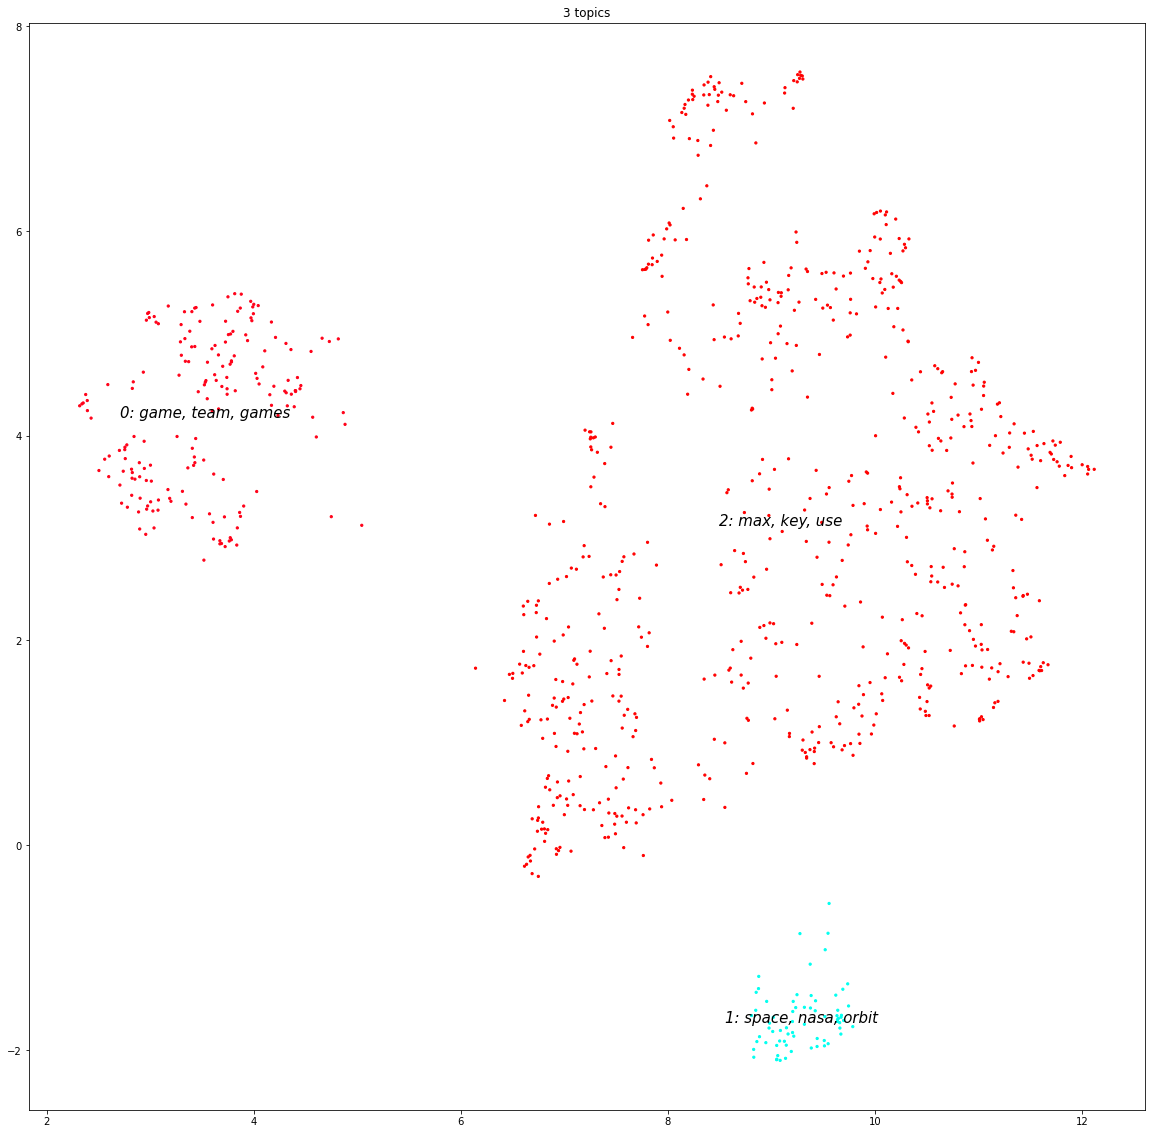

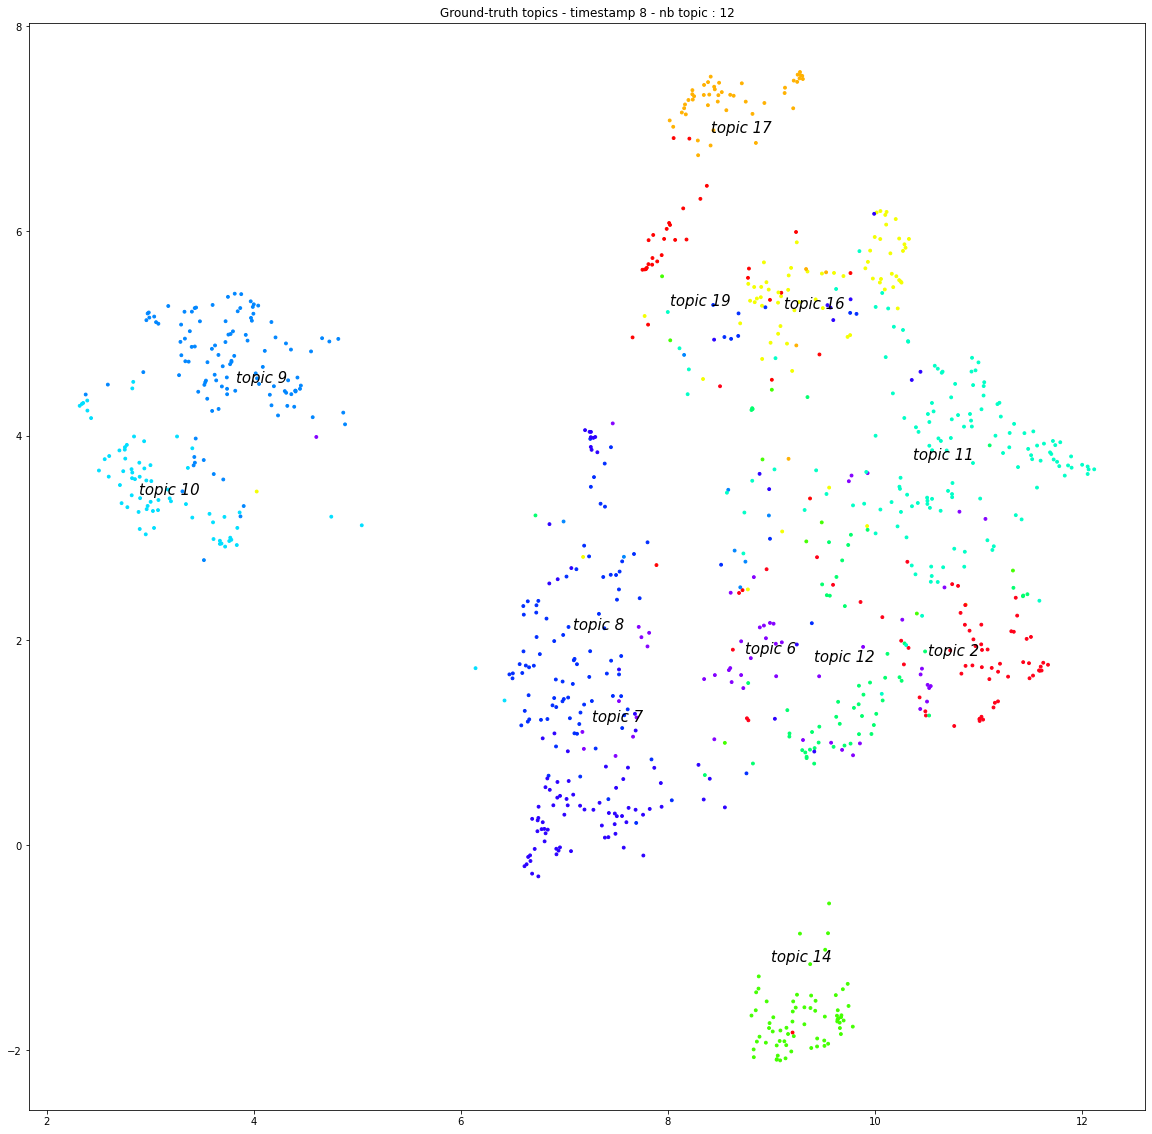

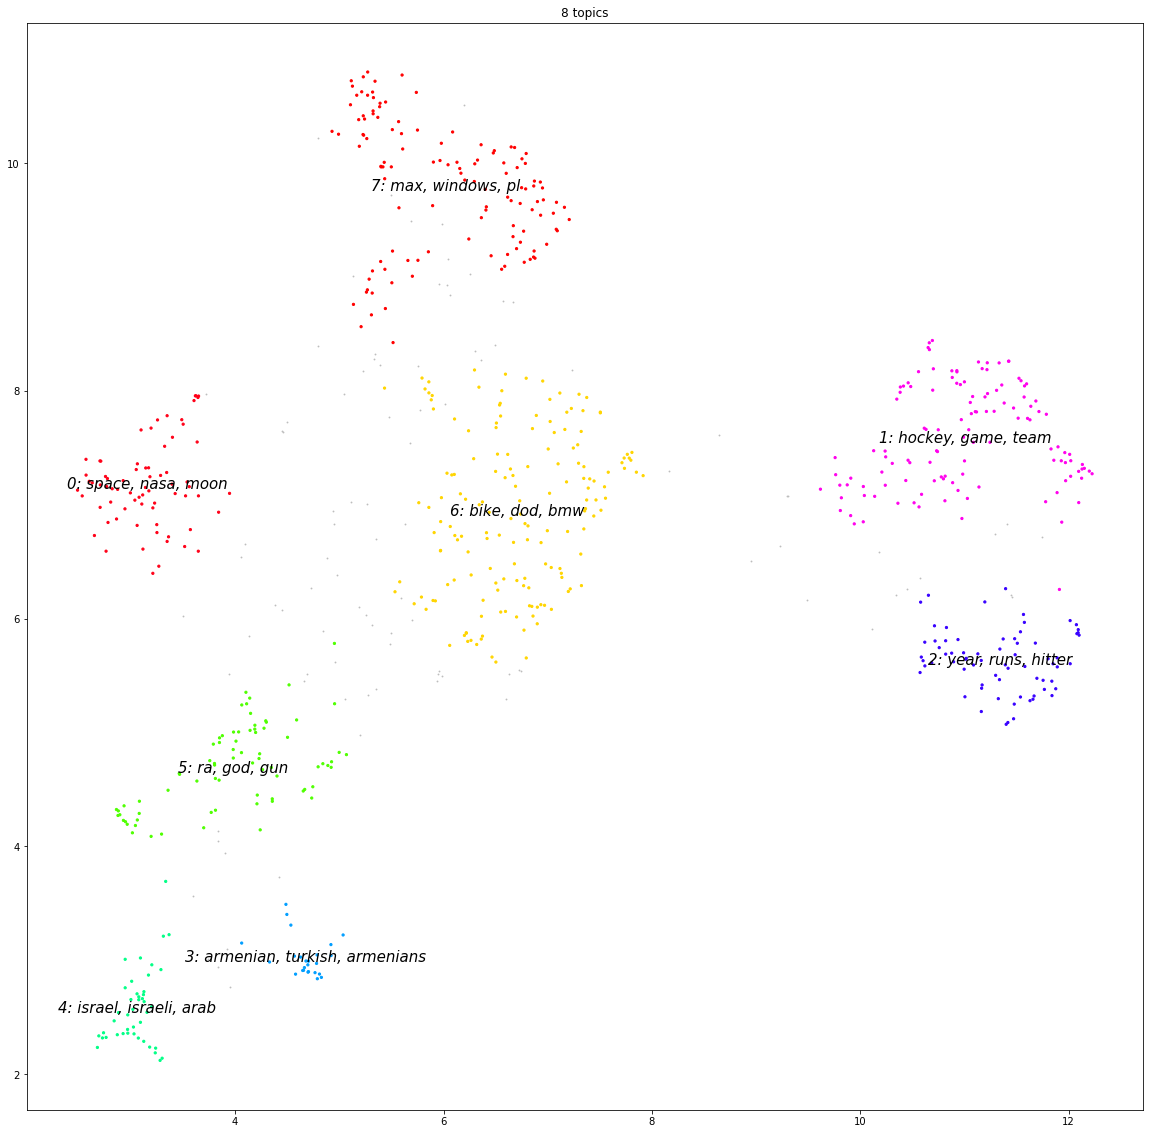

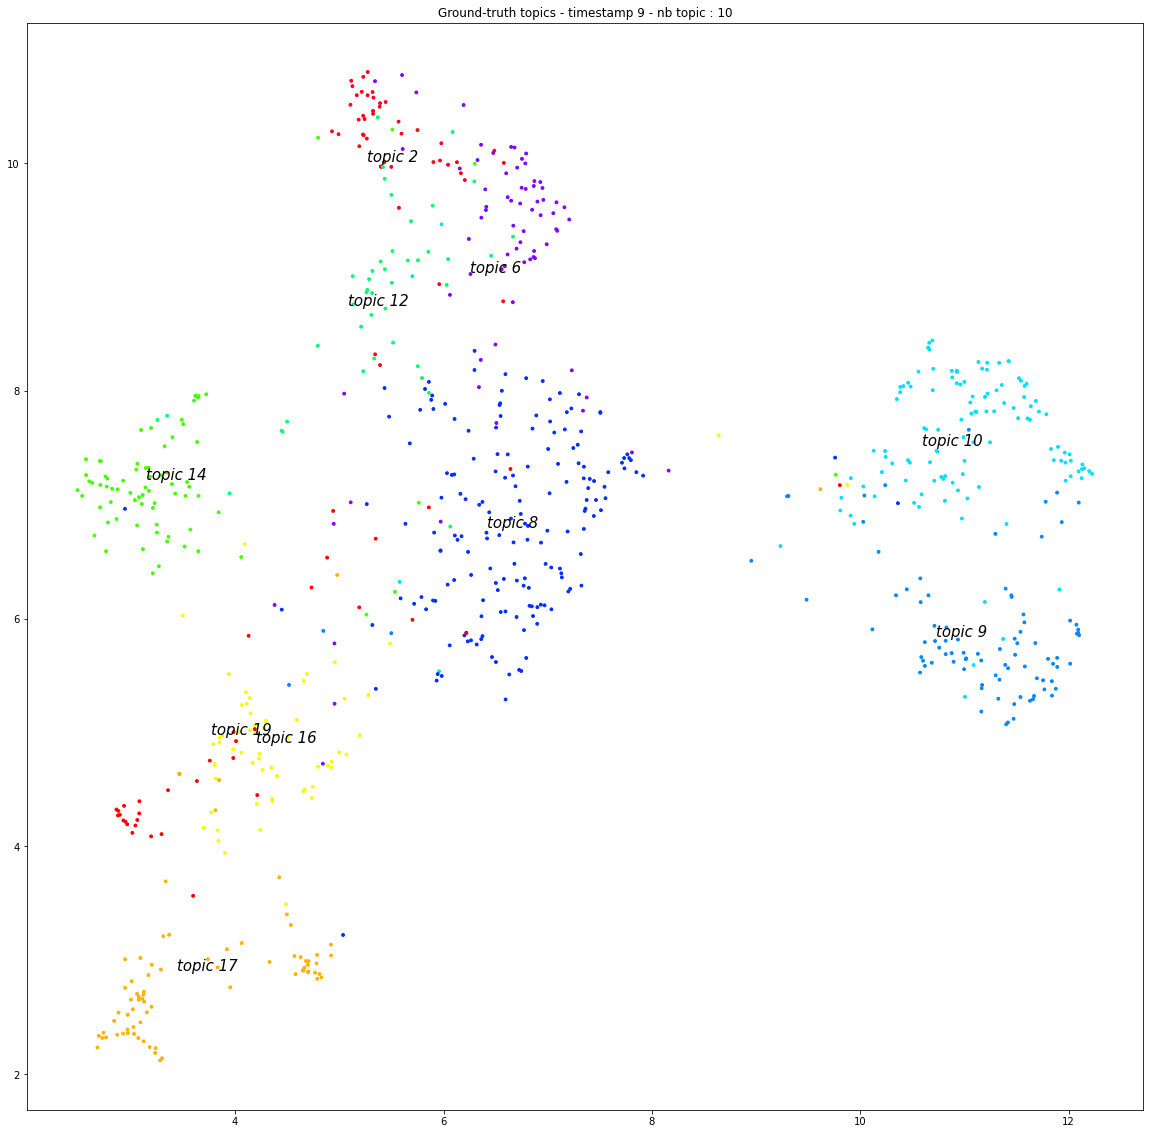

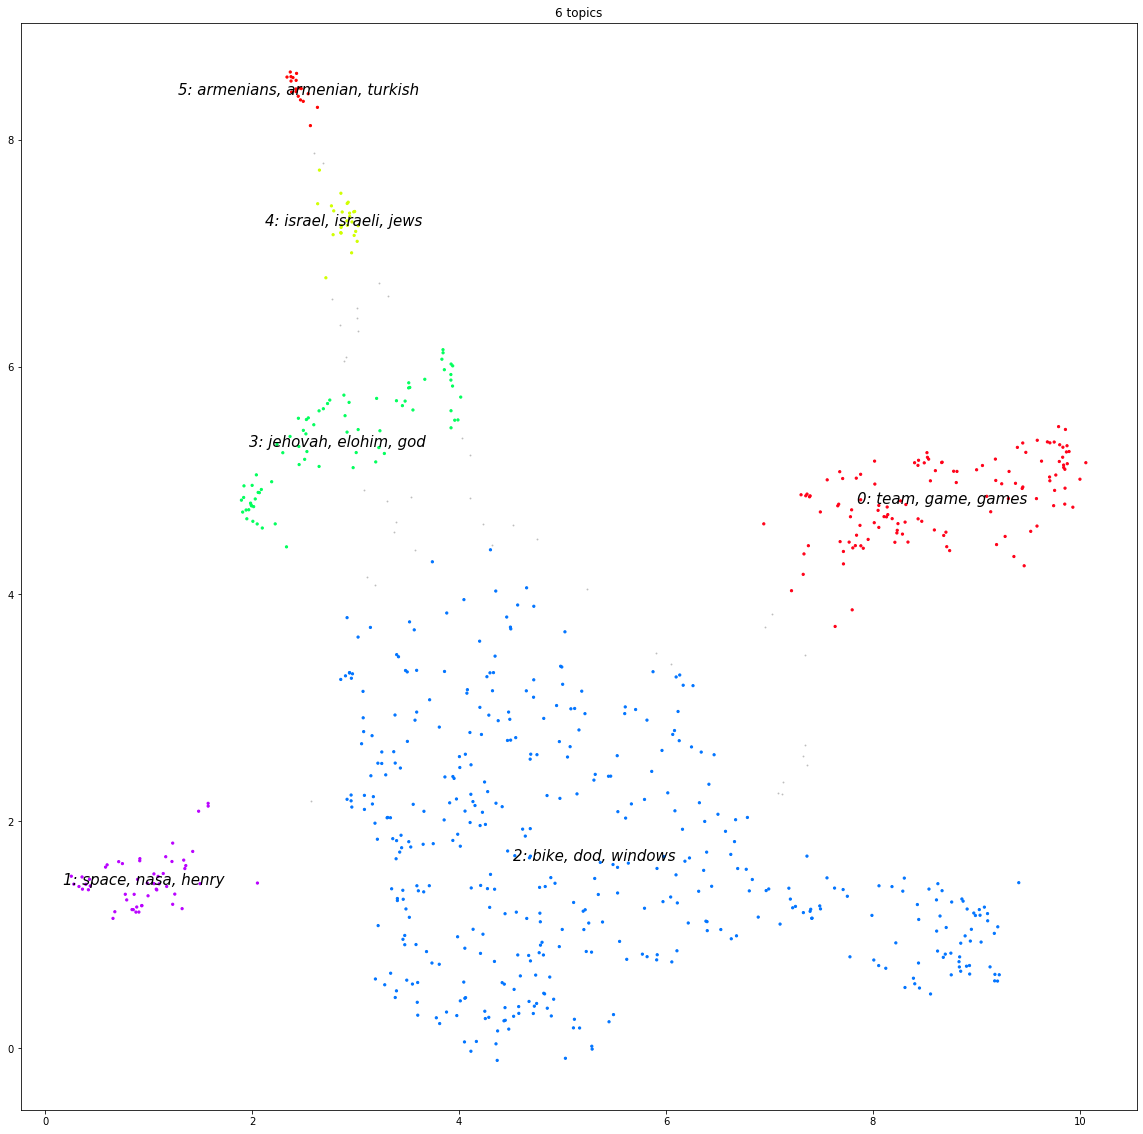

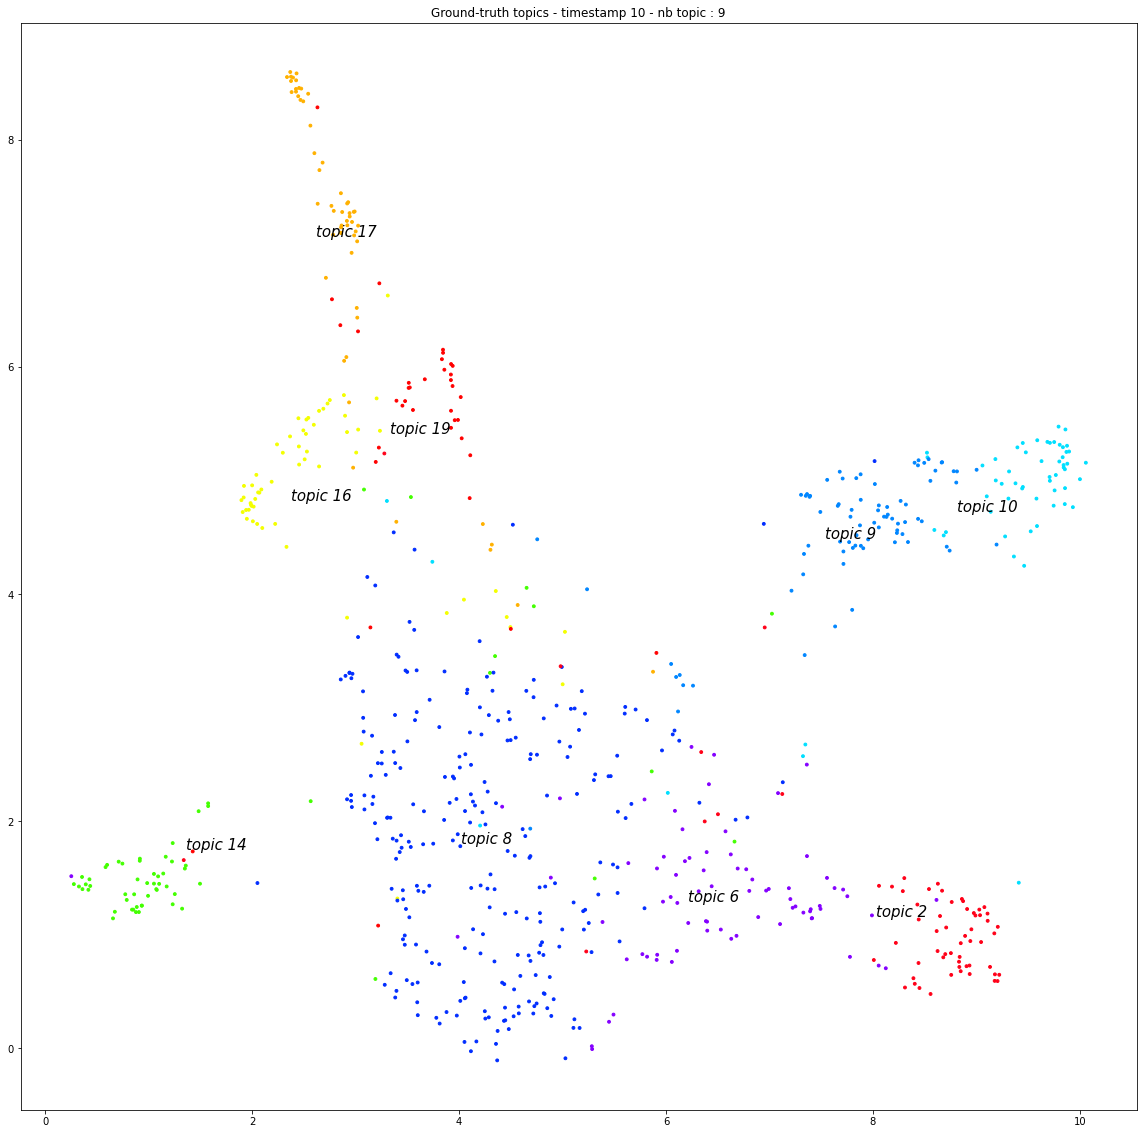

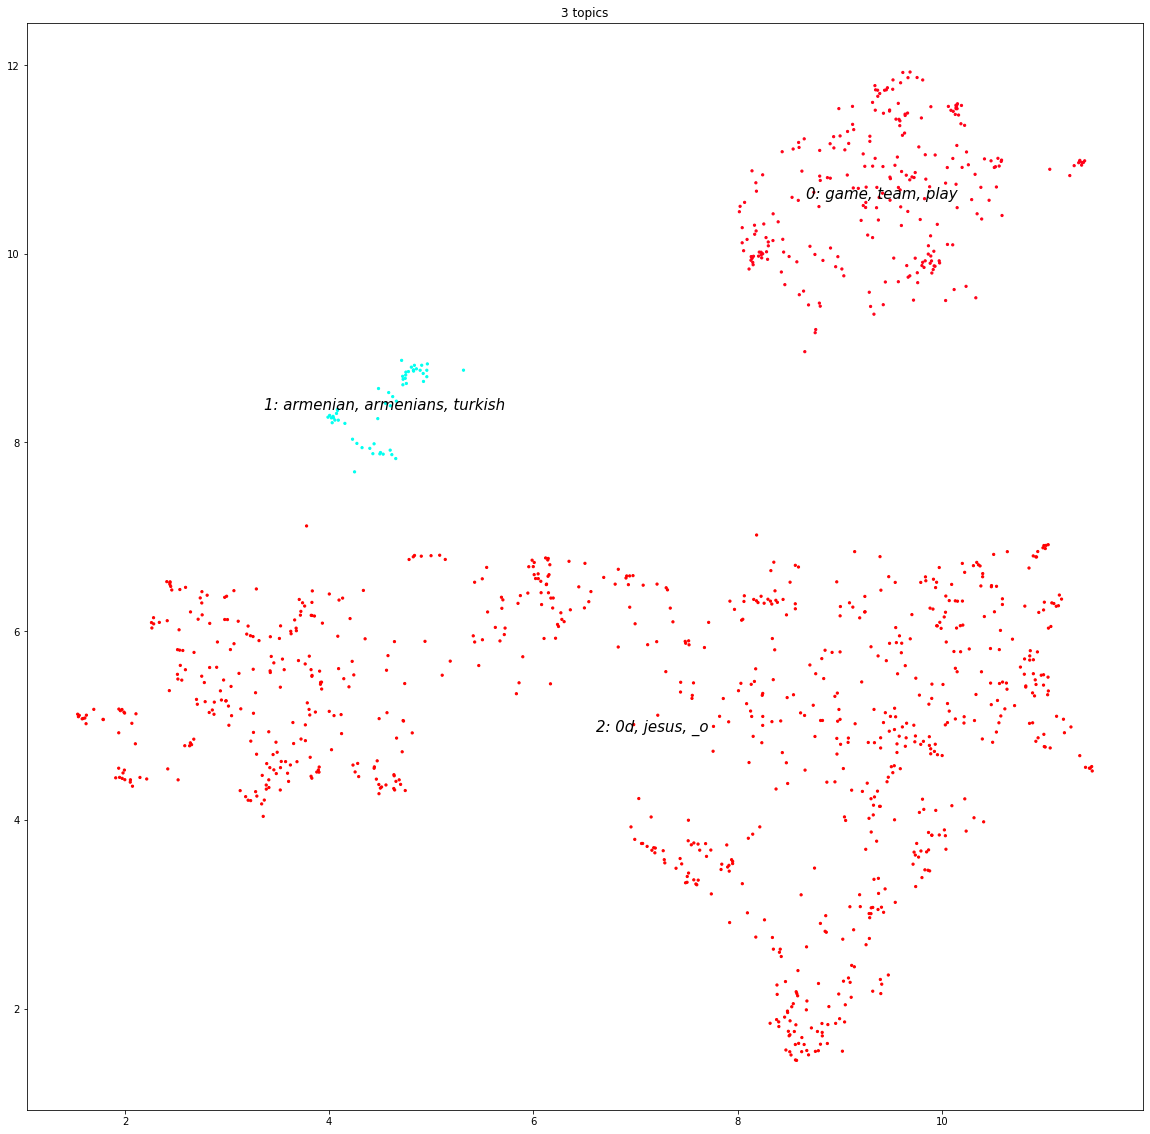

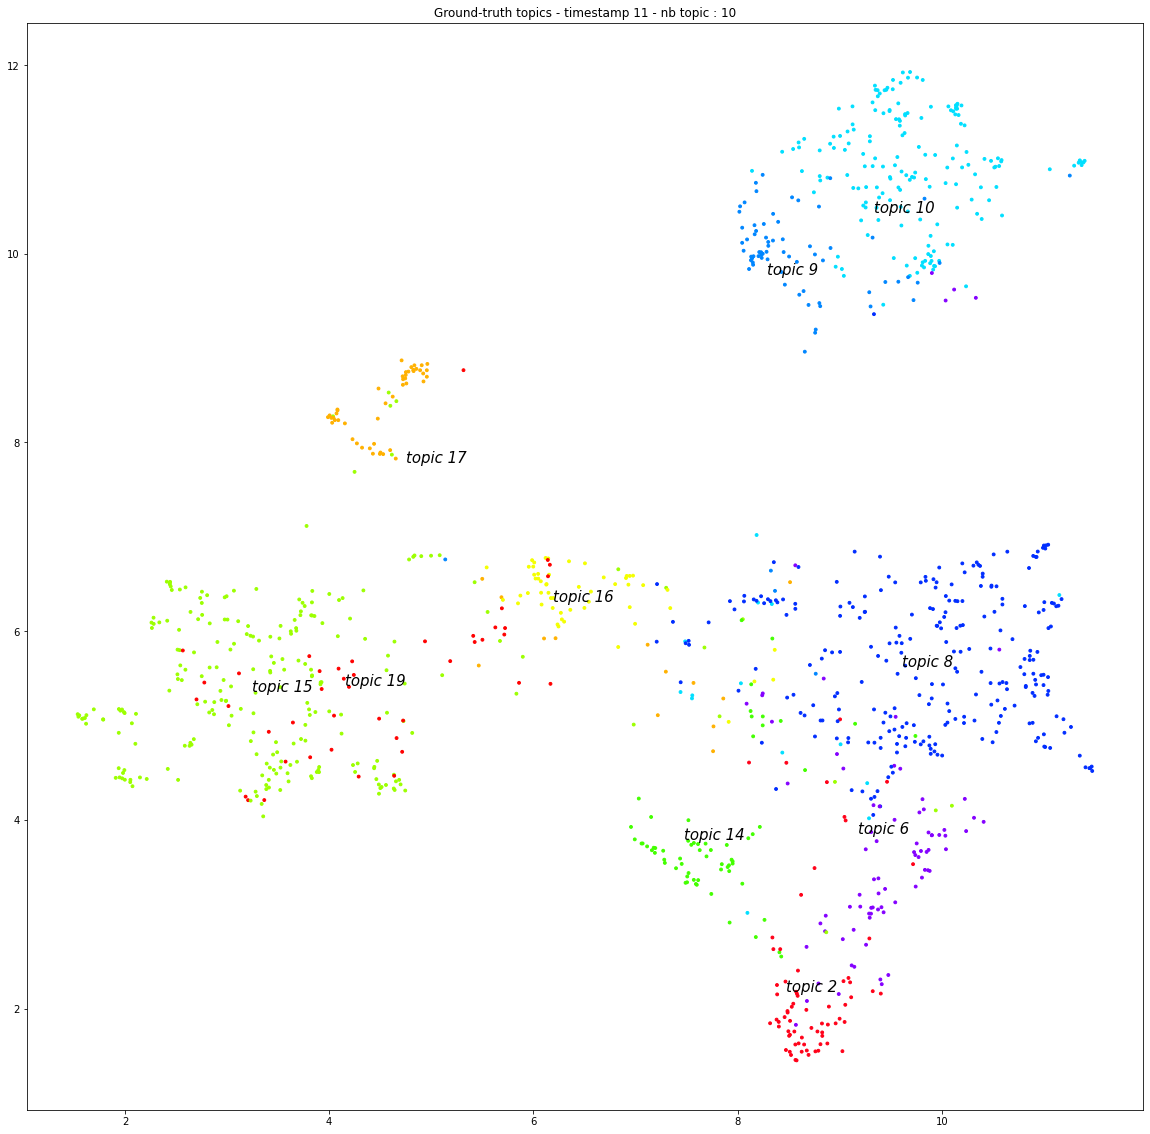

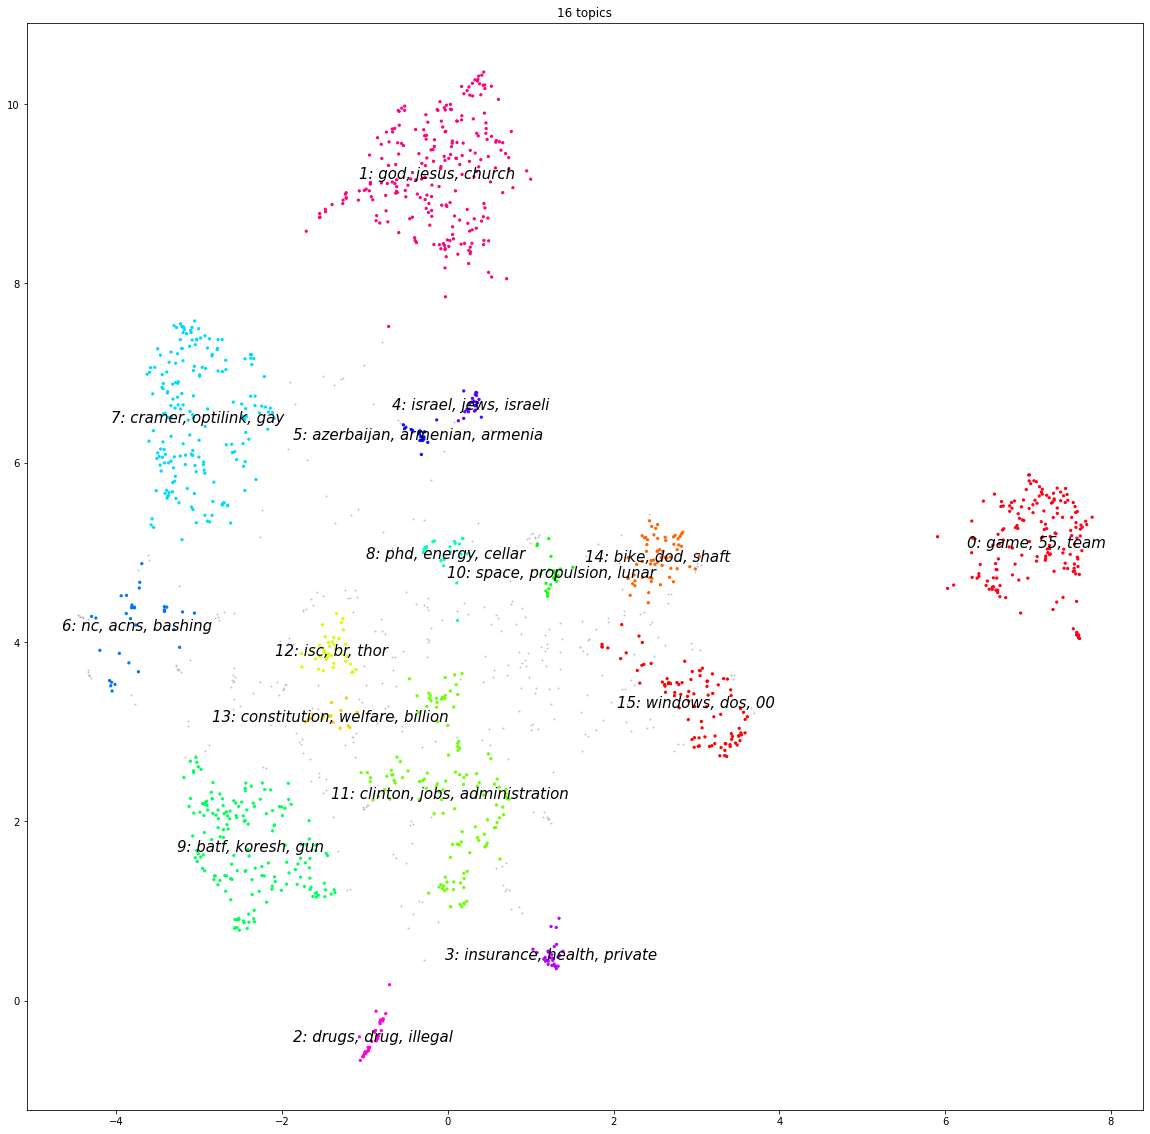

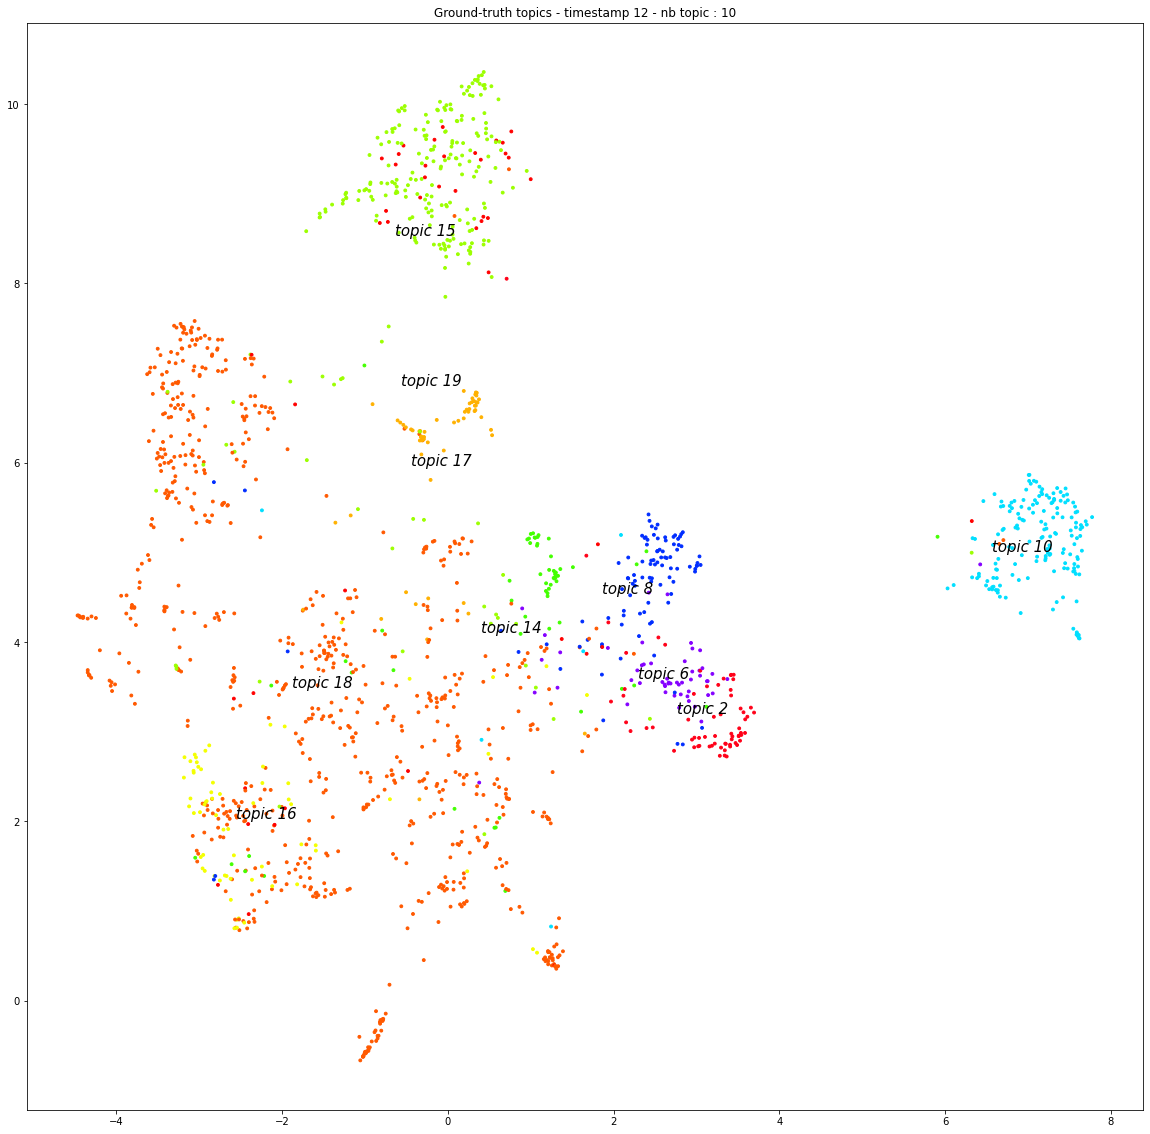

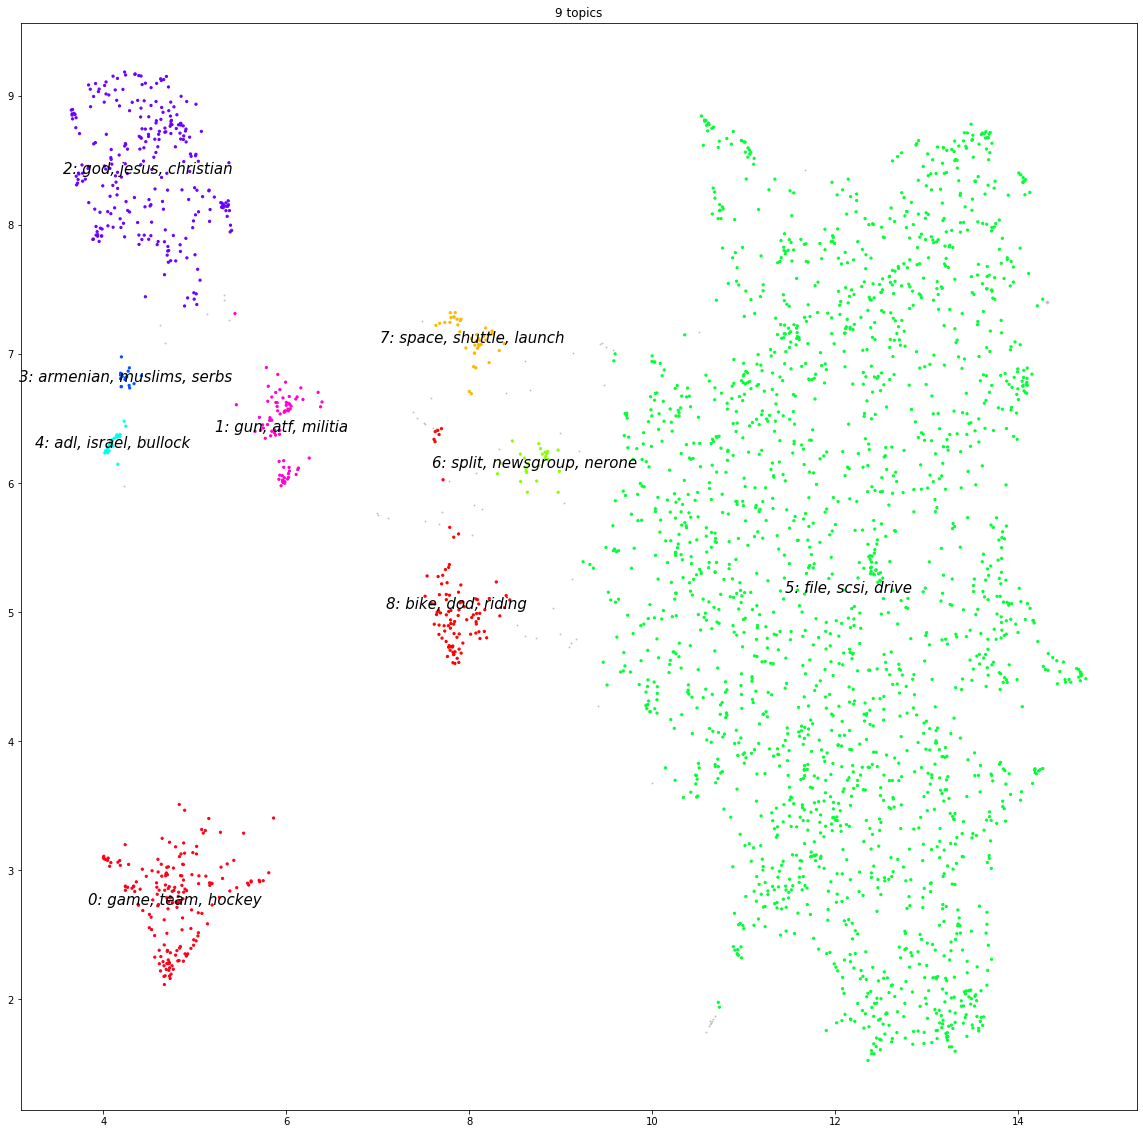

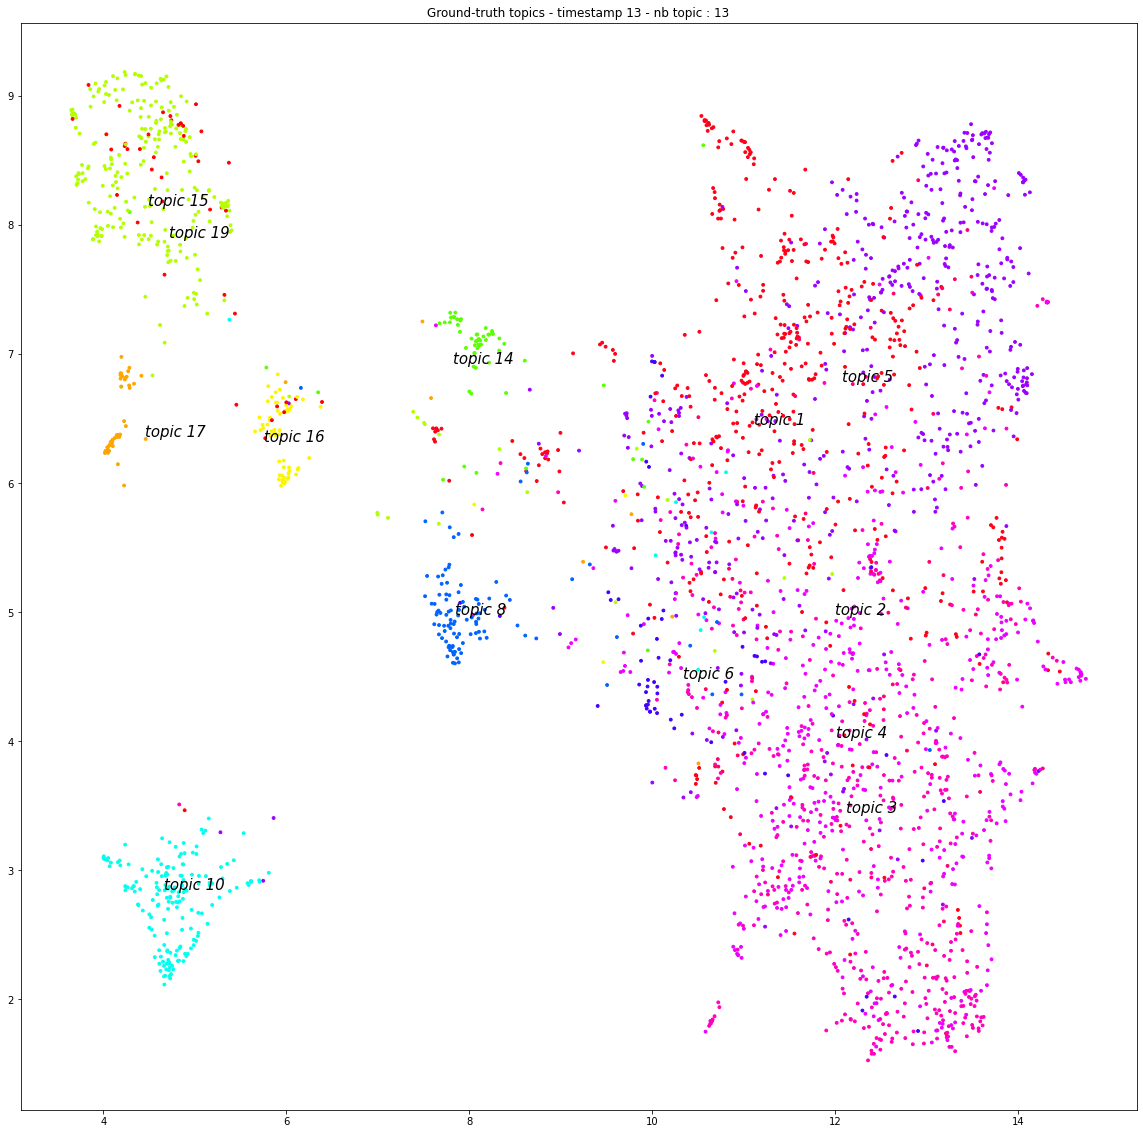

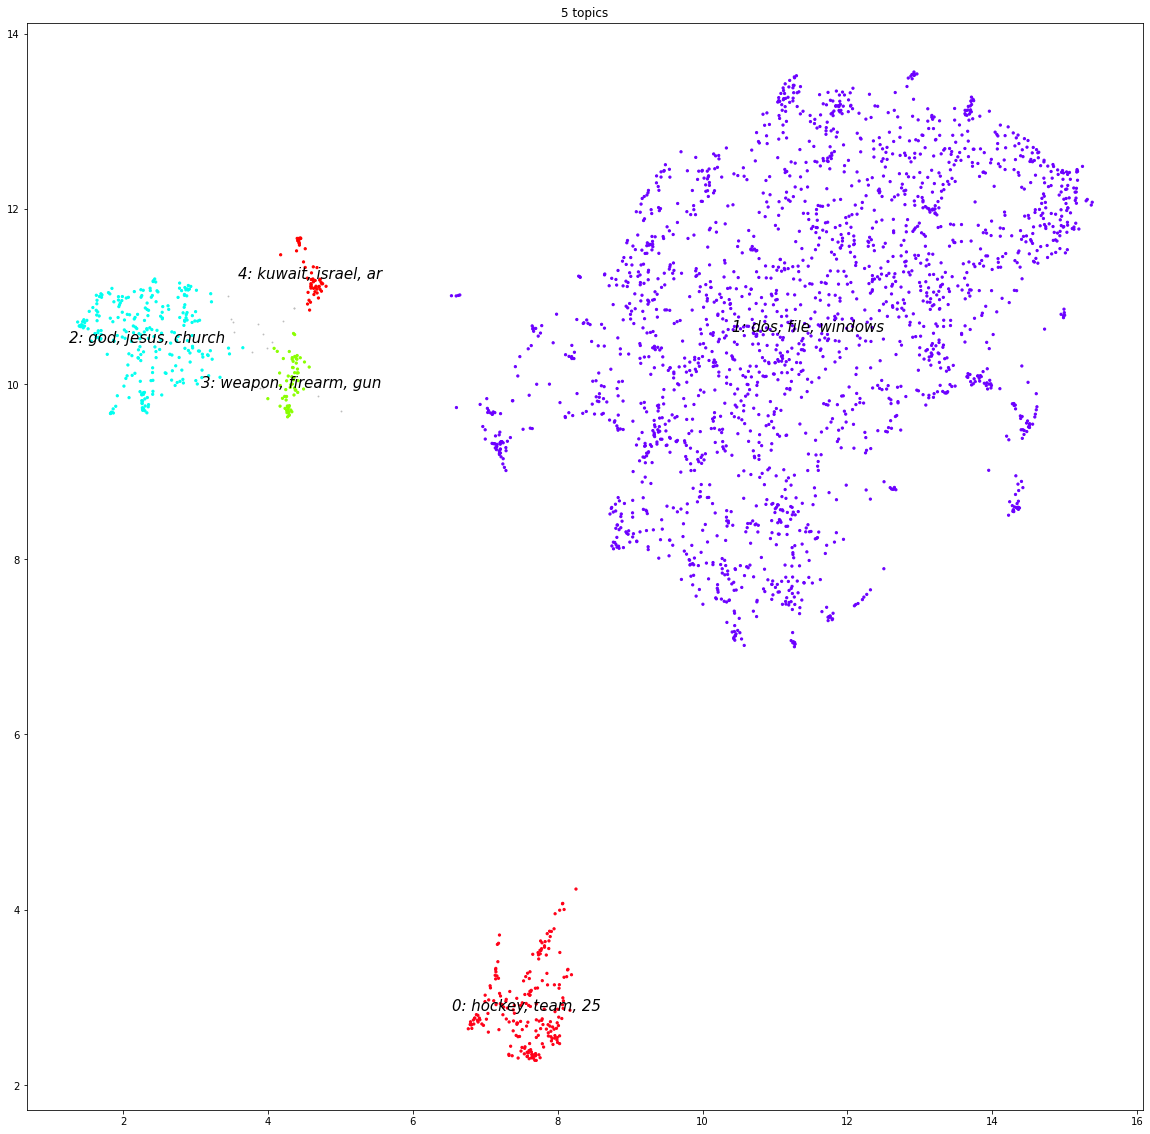

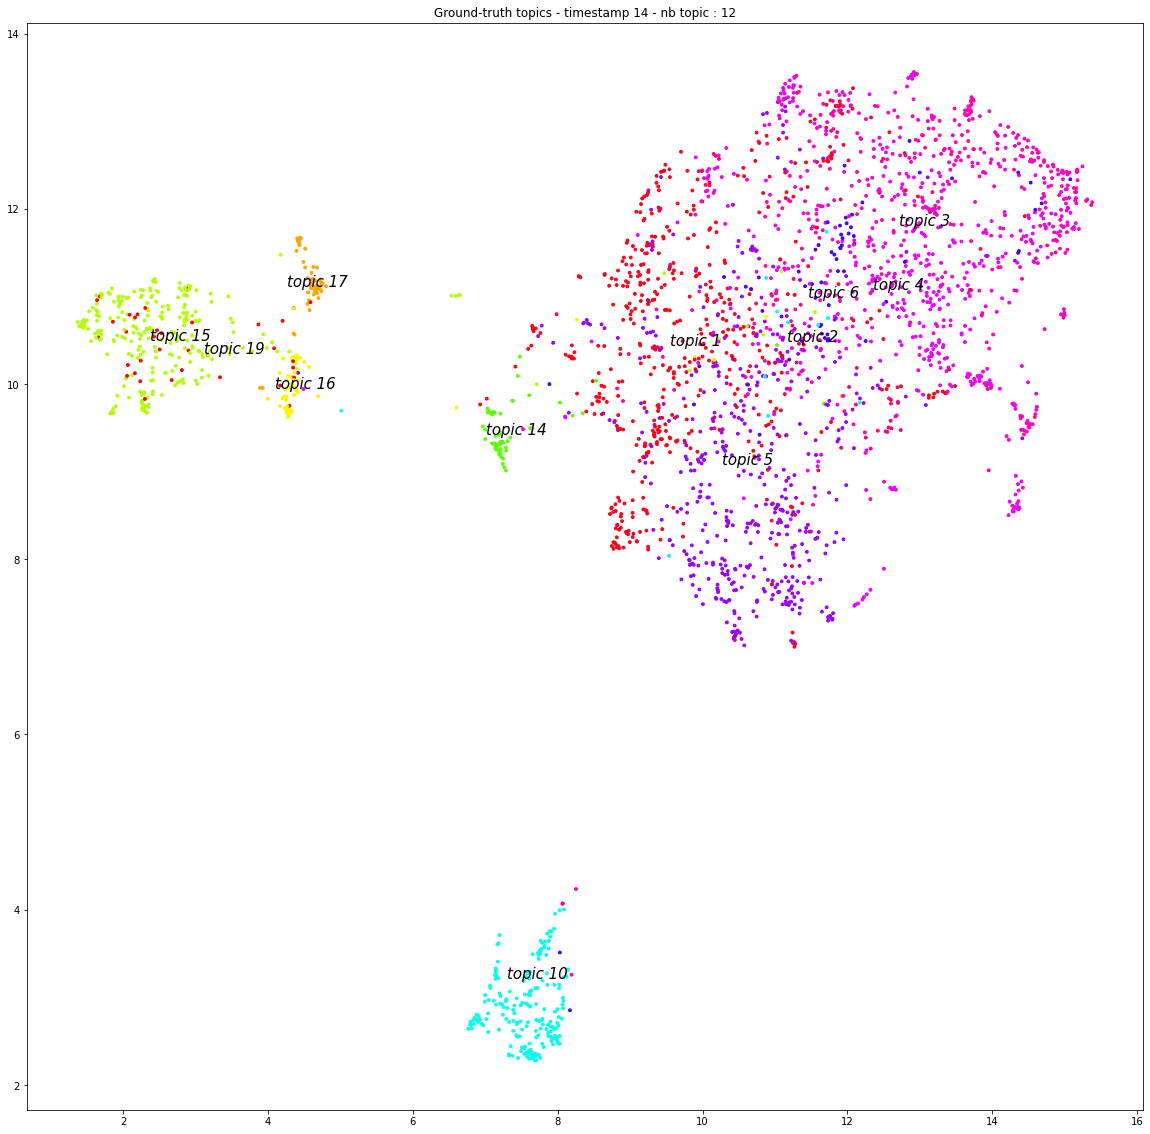

In [ ]:
DF = pd.DataFrame({"words":["word"],
                         "embeddings":["embedding"], "topic" : ["topic"], "timestamp" : ["timestamp"]})

TOP_N_WORDS = []
GT_TOPIC_WORDS = [] # contains the ground-truth topic words for all timestamps (of the topics present)
GT_TOPICS = [] # contains the ground-truth topic IDs for all timestamps (of the topics present)
TOPIC_WORDS = [] # contains the topic words of the topics detected by our model


timestamp = np.unique(df['timestamp'].values.tolist())

# critère pour le calcule de ADNT
nb_topics = pd.DataFrame(columns = ["timestamp", "detected nb topics", "ground-truth nb topics"]) 

for t in timestamp : 
  dataframe = pd.DataFrame(data, columns = ["Doc"])
  dataframe["timestamps"] = timestamps
  dataframe["true topic"] = true_topic
  DATA = dataframe[dataframe["timestamps"] == t].Doc.values
  TT = dataframe[dataframe["timestamps"] == t]["true topic"].values.tolist()

  ####### Embbed the documents #######
  embeddings = embedding_model(DATA)
  embeddings = np.array(embeddings)

  ####### UMAP (dimension) #######
  umap_args = {'n_neighbors': 10,'n_components': 2,'metric': 'cosine'}
  umap_model = umap.UMAP(**umap_args).fit(embeddings)
  umap_model = umap_model.fit(embeddings)
  umap_embeddings = umap_model.transform(embeddings)

  ####### HDBSCAN (clustering) #######
  hdbscan_args = {'min_cluster_size': 15, 'metric': 'euclidean', 'cluster_selection_method': 'eom'} #'min_cluster_size': 15 is the standard value in HDBSCAN
  cluster = hdbscan.HDBSCAN(**hdbscan_args).fit(umap_embeddings)
  #To look at the clusters found by the algorithm, we just need to run "cluster.labels_" or "np.unique(cluster.labels_)"

  # We create a dataframe for the visualization part
  result = pd.DataFrame(umap_embeddings, columns=['x', 'y'])
  result['labels'] = cluster.labels_
  result["text"] = DATA
  result["true topic"] = TT

  ########### c-TF-IDF #############
  '''
  Now, we are going to compute the c-TF-IDF value of each word. The function c-tf-idf has been implemented earlier in 
  the code. 
  We start by creating a dataframe "docs_df" to facilitate the computation of c-TF-IDF.
  '''
  docs_df = pd.DataFrame(DATA, columns=["Doc"])
  docs_df['Topic'] = cluster.labels_
  docs_df['Doc_ID'] = range(len(docs_df))
  docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

  ####### c-TF-IDF #######
  tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(DATA))
  # N.B. : "tf-idf" contains the c-TF-IDF values. Hence, we have a single importance value for each word in a cluster *

  ####### Topic representation #######
  top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
  topic_sizes = extract_topic_sizes(docs_df); topic_sizes.head(10)

  ####### Plot #######
  '''
  In order to display the words along with the clusters (topics), we need to calculate the topic vectors.
  '''
  unique_labels = set(cluster.labels_)
  # Since topic -1 refers to outliers/noises, we need to remove the noise and work with the "real" topics 
  if -1 in unique_labels:
    unique_labels.remove(-1)

  topic_vectors = np.array([result[result["labels"]== label][["x","y"]].mean() for label in unique_labels])

  # We concatenate the three first words of each topic (for the plot)
  topics = [f"{i}: "+top_n_words[i][0][0]+", "+top_n_words[i][1][0]+", "+top_n_words[i][2][0] for i in range(len(topic_vectors))]

  ######################################################## we create a list of all topic words
  TW = [[top_n_words[i][j][0] for j in range(10)] for i in unique_labels]
  TOPIC_WORDS.append(TW)
  ############################################################################################


  # We create a dataframe for the visualization
  result = pd.DataFrame(umap_embeddings, columns=['x', 'y'])
  result['labels'] = cluster.labels_
  result["text"] = DATA # We need to change d2006
  result["true label"] = TT

  # Visualize 2Dembeddings + Topics
  fig, ax = plt.subplots(figsize=(20, 20))
  outliers = result.loc[result.labels == -1, :]
  clustered = result.loc[result.labels != -1, :]
  plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.7)
  plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=5,cmap='hsv_r')
  for i in range(len(topic_vectors)) :
    plt.text(topic_vectors[i][0], topic_vectors[i][1], topics[i]
            ,horizontalalignment='center', verticalalignment='center'
            ,fontsize=15, style = 'oblique') #  bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10}
    #plt.xlim(0,15)
    #plt.ylim(0,15)
  plt.title(f"{len(unique_labels)} topics")

  ############ Word Embeddings ##############
  if -1 in top_n_words :
    topic_matrix = [[top_n_words[i][j][0] for j in range(len(top_n_words[i]))] for i in range(len(top_n_words)-1)] #len(top_n_words)-1
  else :
    topic_matrix = [[top_n_words[i][j][0] for j in range(len(top_n_words[i]))] for i in range(len(top_n_words))]


  # THIS IS FOR PLOTTING THE TOPIC WORDS ! #
  if -1 in top_n_words :
    topic_matrix_proba = [[top_n_words[i][j][1] for j in range(len(top_n_words[i]))] for i in range(len(top_n_words)-1)] #len(top_n_words)-1
  else :
    topic_matrix_proba = [[top_n_words[i][j][1] for j in range(len(top_n_words[i]))] for i in range(len(top_n_words))]

  if -1 in top_n_words :
    del top_n_words[-1]
  TOP_N_WORDS.append(top_n_words)
  # THIS IS FOR PLOTTING THE TOPIC WORDS ! #


  #GloVe = [[embed_dict[topic_matrix[i][j]] for j in range(len(topic_matrix[i]))] for i in range(len(topic_matrix))]
  ##################### Eschew the unknown token prblem ############################
  GloVe = []
  for i in range(len(topic_matrix)):
    A = []
    for j in range(len(topic_matrix[i])):
      if topic_matrix[i][j] in embed_dict :
        A.append(embed_dict[topic_matrix[i][j]])
      else :
        B = [0 for i in range(200)]
        A.append(B)
    GloVe.append(A)
  ##################################################################################

  df0 = pd.DataFrame(topic_matrix[0], columns = ["words"])
  df0["proba"] = topic_matrix_proba[0]
  df0["embeddings"] = GloVe[0]
  df0["topic"] = 0
  df0["timestamp"] = t
  for i in range(1, len(topic_matrix)) :
    df1 = pd.DataFrame(topic_matrix[i], columns = ["words"])
    df1["proba"] = topic_matrix_proba[i]
    df1["embeddings"] = GloVe[i]
    df1["topic"] = i
    df1["timestamp"] = t
    df0 = df0.append(df1)
  DF = DF.append(df0)






################################################################################
############################## Ground-truth ####################################

  docs_df2 = pd.DataFrame(DATA, columns=["Doc"])
  docs_df2['Topic'] = TT
  docs_df2['Doc_ID'] = range(len(docs_df))
  docs_per_topic2 = docs_df2.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})


  ####### Topic representation #######
  tf_idf2, count2 = c_tf_idf(docs_per_topic2.Doc.values, m=len(DATA))
  top_n_words2 = extract_top_n_words_per_topic(tf_idf2, count2, docs_per_topic2, n=20)
  topic_sizes2 = extract_topic_sizes(docs_df2); topic_sizes2.head(10)

  unique_labels2 = np.unique(TT)

  topic_vectors2 = np.array([result[result["true label"]== label][["x","y"]].mean() for label in unique_labels2])

  topics2 = [f"{i}: "+top_n_words2[i][0][0]+", "+top_n_words2[i][1][0]+", "+top_n_words2[i][2][0] for i in unique_labels2]

  GTTW = [[top_n_words2[i][j][0] for j in range(10)] for i in unique_labels2]
  GT_TOPIC_WORDS.append(GTTW)

  #######################################################
  nb_topic2 = pd.DataFrame(columns = ["timestamp", "detected nb topics", "ground-truth nb topics"])
  nb_topic2['timestamp'] = [t]
  nb_topic2['detected nb topics'] = len(unique_labels)
  nb_topic2['ground-truth nb topics'] = len(unique_labels2)
  nb_topics = nb_topics.append(nb_topic2)

  GT_TOPICS.append(list(unique_labels2))
  #######################################################

  # Visualize 2Dembeddings + Topics
  fig, ax = plt.subplots(figsize=(20, 20))
  #outliers = result.loc[result.labels == -1, :]
  #clustered = result.loc[result.labels != -1, :]
  #plt.scatter(result.x, outliers.y, color='#BDBDBD', s=0.7)
  plt.scatter(result.x, result.y, c=result["true label"], s=8,cmap='hsv_r')
  for i in range(len(topic_vectors2)) :
    plt.text(topic_vectors2[i][0], topic_vectors2[i][1], f"topic {unique_labels2[i]}"
            ,horizontalalignment='center', verticalalignment='center'
            ,fontsize=15, style = 'oblique') #  bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10}
    #plt.xlim(0,15)
    #plt.ylim(0,15)
  plt.title(f"Ground-truth topics - timestamp {t} - nb topic : {len(unique_labels2)}")



#**Topic evolution**

# Chamfer distance

**Installation**

In [ ]:
%%capture 

!pip install chamferdist

import torch
import tensorflow as tf
from chamferdist import ChamferDistance

# Initialize Chamfer distance module
chamferDist = ChamferDistance()

We create a dataframe CD containing the chamfer distances between topics at each timestamp.

In [ ]:
CD = pd.DataFrame(columns=['timestamp','topic 1','topic 2','CD'])
k = 0
for t in range(len(timestamp)-1) :
  for topic_i in np.unique(DF[DF["timestamp"] == timestamp[t]]["topic"].values.tolist()) :
    topic0 = DF[(DF["timestamp"] == timestamp[t]) & (DF["topic"] == topic_i)]["embeddings"].values.tolist() # We retrieve the word embeddings of the topic representation of i-th topic at time t.
    for topic_j in np.unique(DF[DF["timestamp"] == timestamp[t+1]]["topic"].values.tolist()) :
      topic1 = DF[(DF["timestamp"] == timestamp[t+1]) & (DF["topic"] == topic_j)]["embeddings"].values.tolist() # We retrieve the word embeddings of the topic representation of j-th topic at time t+1
      ########################################
      ########## Calculation of CD ###########
      source_cloud = torch.as_tensor([topic0])
      target_cloud = torch.as_tensor([topic1])
      dist_forward = chamferDist(source_cloud, target_cloud) # Forward Chamfer Distance
      ########################################
      # We can now fill the CD dataframe
      k += 1
      CD.loc[k] = pd.Series({'timestamp':timestamp[t], 'topic 1':topic_i, 'topic 2':topic_j, 'CD':dist_forward.detach().cpu().item()}) # We should replace "topic_i" & "topic_j" by their word representation !


Tracking the topics

In [ ]:
def sorted_CD(CD, time_t, topic) :
  '''
  Given a time t and a topic A, this function returns the top N topics at time t+1 that have the smallest CD values with topic A 
  (ranked in increasing order), and also returns the corrersponding CD values.

  CD := is the Chamfer distance dataframe, it is composed of the columns "time", "topic 1", "topic 2" and "CD".
  time_t := is time t 
  topic := is the topic A (at time t).
  N := corresponds to the number of topics and CD values we retrieve

  topN_minCD := is a list containing the N smallest CD values (sorted in increasing order)
  topics_topN_minCD := is a list containing the topics corresponding to the topN_minCD values.
  '''
  dataframe = CD[(CD["timestamp"] == time_t) & (CD["topic 1"] == topic)][["topic 2","CD"]]
  N = len(dataframe)
  topN_minCD = dataframe['CD'].nsmallest(N).values.tolist()
  topics_topN_minCD = []
  h = 0
  for k in topN_minCD :
    topic_k = dataframe[dataframe["CD"] == k]["topic 2"].values.tolist()[0]
    topics_topN_minCD.append(topic_k)
    #if len(dataframe[dataframe["CD"] == k]["topic 2"].values.tolist()) == 1 :
    #  topic_k = dataframe[dataframe["CD"] == k]["topic 2"].values.tolist()[0]
    #  topics_topN_minCD.append(topic_k)
    #else :
    #  len = len(dataframe[dataframe["CD"] == k]["topic 2"].values.tolist())
 
  return topN_minCD, topics_topN_minCD


def bp_dataframe(CD) :
  BP = pd.DataFrame(columns = ["timestamp", "topic of reference", "ranking", "distance"])
  for timestamp in np.unique(CD["timestamp"].values.tolist()) :
    for topic_ref in np.unique(CD[(CD["timestamp"] == timestamp)]["topic 1"].values.tolist()):
        distances, A = sorted_CD(CD, timestamp, topic_ref)
        time = [timestamp for i in range(len(distances))]
        topicref = [topic_ref for i in range(len(distances))]
        BP1 = pd.DataFrame(columns = ["timestamp", "topic of reference", "ranking", "distance"])
        BP1["timestamp"] = time
        BP1["topic of reference"] = topicref
        BP1["ranking"] = [i+1 for i in range(len(distances))]
        BP1["distance"] = distances
        BP = BP.append(BP1)
  return BP

def tracking(CD) :
  '''
  We will use this function to track topics over time, using the chamfer distance between topics.
  '''
  BP = pd.DataFrame(columns = ["timestamp", "topic of reference", "topic t+1", "ranking", "distance"])
  for timestamp in np.unique(CD["timestamp"].values.tolist()) :
    for topic_ref in np.unique(CD[(CD["timestamp"] == timestamp)]["topic 1"].values.tolist()):
        distances, topic2 = sorted_CD(CD, timestamp, topic_ref)
        time = [timestamp for i in range(len(distances))]
        topicref = [topic_ref for i in range(len(distances))]
        BP1 = pd.DataFrame(columns = ["timestamp", "topic of reference", "ranking", "distance"])
        BP1["timestamp"] = time
        BP1["topic of reference"] = topicref
        BP1["topic t+1"] = topic2
        BP1["ranking"] = [i+1 for i in range(len(distances))]
        BP1["distance"] = distances
        BP = BP.append(BP1)
  return BP


CD2 = bp_dataframe(CD)
Tracking = tracking(CD)

In [ ]:
Tracking

timestamp  topic of reference  topic t+1 ranking     distance
0         0.0                 0.0        6.0       1   718.168274
1         0.0                 0.0        4.0       2   739.791199
2         0.0                 0.0        1.0       3   743.909973
3         0.0                 0.0        1.0       4   743.909973
4         0.0                 0.0        1.0       5   743.909973
..        ...                 ...        ...     ...          ...
0        13.0                 8.0        3.0       1   700.838684
1        13.0                 8.0        1.0       2  1009.192383
2        13.0                 8.0        2.0       3  1082.988281
3        13.0                 8.0        0.0       4  1117.949829
4        13.0                 8.0        4.0       5  1229.179810

[627 rows x 5 columns]

**Detection of Emerging, Remainging and Vanishing topics**

In [ ]:
track = Tracking[(Tracking["distance"] <= 500)]
real_track = pd.DataFrame(columns = ["timestamp", "remaining", "emerging", "vanishing"])
for i in np.unique(track["timestamp"].values.tolist()) :
  time_t = i+1
  time_minus = i
  ##################################
  remaining = []
  emerging = []
  vanishing = []
  ##################################
  CD4 = CD[(CD["timestamp"] == time_t) or (CD["timestamp"] == time_minus)]

  for topic in np.unique(CD4[CD4["timestamp"] == time_t]["topic 1"].values.tolist()) :
    if topic in np.unique(Tracking[(Tracking["timestamp"] == time_minus) & (Tracking["ranking"] == 1)]["topic t+1"].values.tolist()) :
      remaining.append(topic)
    else :
      emerging.append(topic)
  
  for topic in np.unique(CD4[CD4["timestamp"] == time_minus]["topic 1"].values.tolist()) :
    if topic not in np.unique(CD4[CD4["timestamp"] == time_minus]["topic 1"].values.tolist()) :

  for topic in track[topics_over_time["Timestamp"] == time_t].Name.values.tolist() :
    if topic in topics_over_time[topics_over_time["Timestamp"] == time_minus].Name.values.tolist() :
      remaining.append(topic)
    else :
      emerging.append(topic)
  for topic in topics_over_time[topics_over_time["Timestamp"] == time_minus].Name.values.tolist() :
    if topic not in topics_over_time[topics_over_time["Timestamp"] == time_t].Name.values.tolist() :
      vanishing.append(topic)

  timee = [f"{i} to {i+1}"]
  Remaining = [', '.join(remaining)]
  Emerging = [', '.join(emerging)]
  Vanishing = [', '.join(vanishing)]


In [ ]:
BERTopic_timestamps = np.unique(topics_over_time["Timestamp"].values.tolist())
DTF = pd.DataFrame(columns = ["timestamp", "remaining", "emerging", "vanishing"])
for i in range(len(BERTopic_timestamps) - 1) :
  time_t = BERTopic_timestamps[i+1]
  time_minus = BERTopic_timestamps[i]
  ##################################
  remaining = []
  emerging = []
  vanishing = []
  ##################################
  for topic in topics_over_time[topics_over_time["Timestamp"] == time_t].Name.values.tolist() :
    if topic in topics_over_time[topics_over_time["Timestamp"] == time_minus].Name.values.tolist() :
      remaining.append(topic)
    else :
      emerging.append(topic)
  for topic in topics_over_time[topics_over_time["Timestamp"] == time_minus].Name.values.tolist() :
    if topic not in topics_over_time[topics_over_time["Timestamp"] == time_t].Name.values.tolist() :
      vanishing.append(topic)

  timee = [f"{i} to {i+1}"]
  Remaining = [', '.join(remaining)]
  Emerging = [', '.join(emerging)]
  Vanishing = [', '.join(vanishing)]

  DTF0 = pd.DataFrame(columns = ["timestamp", "remaining", "emerging", "vanishing"])
  DTF0["timestamp"] = timee
  DTF0["remaining"] = Remaining
  DTF0["emerging"] = Emerging
  DTF0["vanishing"] = Vanishing
  DTF = DTF.append(DTF0)

#BERTopic

In [ ]:
!pip install bertopic
!pip install octis 
!pip install gensim

In [ ]:
dataBERTopic = []
for text in data :
  tokenizer = RegexpTokenizer(r'\w+')
  text_tokens = tokenizer.tokenize(text)
  list_of_words = [word for word in text_tokens if not word in stopwords.words('english')] 
  real_text = " ".join(list_of_words)
  dataBERTopic.append(real_text)

In [ ]:
# this cell takes 25 min to run !
from bertopic import BERTopic
topic_model = BERTopic(min_topic_size=35, verbose=True)
topics, _ = topic_model.fit_transform(dataBERTopic)# this cell takes 25 min to run !

Downloading:   0%|          | 0.00/1.18k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/10.6k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/612 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/116 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/39.3k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/350 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/13.2k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/349 [00:00<?, ?B/s]

Batches:   0%|          | 0/589 [00:00<?, ?it/s]

2022-08-31 07:02:41,223 - BERTopic - Transformed documents to Embeddings
2022-08-31 07:03:33,228 - BERTopic - Reduced dimensionality
2022-08-31 07:03:37,703 - BERTopic - Clustered reduced embeddings


In [ ]:
topics_over_time = topic_model.topics_over_time(docs=dataBERTopic, 
                                                topics=topics, 
                                                timestamps=TIME, 
                                                global_tuning=True, 
                                                evolution_tuning=True,
                                                nr_bins=20)

topic_model.visualize_topics_over_time(topics_over_time, top_n_topics=20)

15it [00:46,  3.08s/it]


In [ ]:
nb_topics_BERTopic = [] #Contains the number of detected topics at each timestamp
for time in np.unique(topics_over_time['Timestamp'].values.tolist()) :
  dtf = topics_over_time[topics_over_time['Timestamp'] == time].Topic.values.tolist()
  nb_topics_BERTopic.append(len(np.unique(dtf)))

# Remaining, emerging, vanishing

In [ ]:
BERTopic_timestamps = np.unique(topics_over_time["Timestamp"].values.tolist())
DTF = pd.DataFrame(columns = ["timestamp", "remaining", "emerging", "vanishing"])
for i in range(len(BERTopic_timestamps) - 1) :
  time_t = BERTopic_timestamps[i+1]
  time_minus = BERTopic_timestamps[i]
  ##################################
  remaining = []
  emerging = []
  vanishing = []
  ##################################
  for topic in topics_over_time[topics_over_time["Timestamp"] == time_t].Name.values.tolist() :
    if topic in topics_over_time[topics_over_time["Timestamp"] == time_minus].Name.values.tolist() :
      remaining.append(topic)
    else :
      emerging.append(topic)
  for topic in topics_over_time[topics_over_time["Timestamp"] == time_minus].Name.values.tolist() :
    if topic not in topics_over_time[topics_over_time["Timestamp"] == time_t].Name.values.tolist() :
      vanishing.append(topic)

  timee = [f"{i} to {i+1}"]
  Remaining = [', '.join(remaining)]
  Emerging = [', '.join(emerging)]
  Vanishing = [', '.join(vanishing)]

  DTF0 = pd.DataFrame(columns = ["timestamp", "remaining", "emerging", "vanishing"])
  DTF0["timestamp"] = timee
  DTF0["remaining"] = Remaining
  DTF0["emerging"] = Emerging
  DTF0["vanishing"] = Vanishing
  DTF = DTF.append(DTF0)

In [ ]:
timee = "0 to 1"

list_of = DTF[DTF["timestamp"] == timee]["remaining"].values.tolist()[0].split(", ")
print("remaining :",len(list_of))
#list_of
list_of = DTF[DTF["timestamp"] == timee]["emerging"].values.tolist()[0].split(", ")
print("emerging :",len(list_of))
list_of = DTF[DTF["timestamp"] == timee]["vanishing"].values.tolist()[0].split(", ")
print("vanishing :",len(list_of))

remaining : 44
emerging : 3
vanishing : 4


# Topic Evolution Evaluation

**Criteria of difference**

We compute the criteria of difference for BERTopic and our model and display the results.

In [ ]:
detected = nb_topics["detected nb topics"].values.tolist()
gt = nb_topics["ground-truth nb topics"].values.tolist()
plotlines = [gt, detected, nb_topics_BERTopic]
print(detected)
print(gt)

l = [abs(detected[i]-gt[i]) for i in range(len(detected))]
sum = np.sum(l)
metric = sum/len(l)
print("Our model's average right number of topics ADNT = ",metric)

li = [abs(nb_topics_BERTopic[i]-gt[i]) for i in range(len(nb_topics_BERTopic))]
sum = np.sum(li)
metric = sum/len(li)
print("BERTopic's average right number of topics ADNT = ",metric)

[4, 7, 10, 3, 4, 4, 10, 8, 3, 8, 6, 3, 16, 9, 5]
[6, 8, 11, 12, 11, 11, 11, 11, 12, 10, 9, 10, 10, 13, 12]
Our model's average right number of topics ADNT =  4.6
BERTopic's average right number of topics ADNT =  28.333333333333332


#Graph of GT number of topics

**Graph of the evolution of the number of topics detected vs ground-truth values**

Text(0.5, 1.0, 'Observed number of topics')

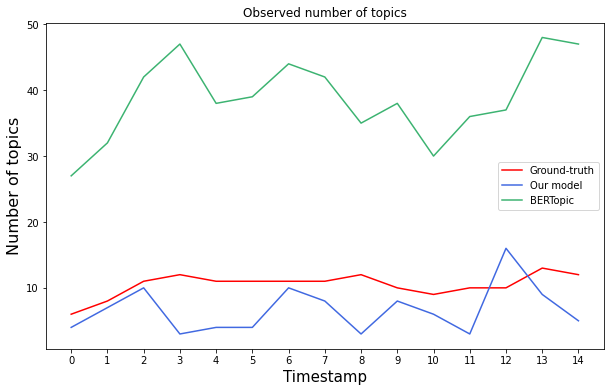

In [ ]:
fig, ax = plt.subplots(figsize=(10,6))
##### nations ######
color = ["red","royalblue", "mediumseagreen"] #,"red", "blueviolet","darkorange","chartreuse","blue", "peru", "cyan","coral"]
label = ["Ground-truth", "Our model", "BERTopic"]
marker = ['^','v','o','o','s','x','+','o','s','<']
for i in range(3) :
  plt.plot(nb_topics["timestamp"].values.tolist(), plotlines[i], c=color[i], linestyle='-', ms= '2', label = label[i]) #marker = "o",

#plt.plot(disease.timestep.values, disease.proba.values, c="springgreen", linestyle='-',  label = 'disease')
#plt.plot(continent.timestep.values, continent.proba.values, c="orangered", linestyle='-', label = 'continent')
#plt.plot(affected.timestep.values, affected.proba.values, c="blueviolet", linestyle='-', label = 'affected')

plt.ylabel("Number of topics", size = 16)
plt.xlabel("Timestamp", size = 15)
ax.set_xticks(np.arange(len(nb_topics["timestamp"].values.tolist())))
plt.legend() # bbox_to_anchor =(1.12, 1.1), ncol = 5
plt.title("Observed number of topics")
#plt.title(f"topic : Nuclear weapons")

#Precision Recall

In [ ]:
#@@@@@@@@@@@@@@ Ground-truth topic words #@@@@@@@@@@@@@@@@@

gt_words = [['atheism', 'atheists', 'god', 'keith', 'islam', 'religion', 'livesey', 'morality', 'islamic', 'caltech', 'atheist', 'religious', 'sgi', 'evidence', 'solntze', 'moral', 'wpd', 'exist', 'belief', 'mathew'],
            ['graphics', 'image', 'jpeg', 'images', 'gif', '3d', 'format', 'files', 'color', 'ftp', 'pub', 'file', 'package', 'software', 'data', 'polygon', 'tiff', 'display', 'version', 'program'],
            ['max', 'b8f', 'a86', '145', 'os','ms', 'misc', '1d9', 'windows', '0t', '34u', '75u', '2di', '1t', 'giz', 'bhj', 'wm', '3t', '2tm', 'bxn'],
            ['scsi', 'drive', 'ide', 'pc', 'hard', 'os', 'controller', 'drives', 'bus', 'disk', 'card', 'bios', 'isa', 'floppy', 'vlb', 'rom', 'dos', 'tape', 'port', 'adaptec'],
            ['mac', 'apple', 'quadra', 'nubus', 'lc', 'centris', 'fpu', 'scsi', 'ram', 'se', 'drive', 'monitor', 'simms', 'powerbook', 'memory', '32', 'problem', 'duo', 'bit', 'pds'],
            ['window', 'motif', 'widget', 'server', 'mit', 'output', 'file', 'entry', 'x11r5', 'xterm', 'application', 'program', 'display', 'x11', 'xt', 'xlib', 'r5', 'lcs', 'contrib', 'sun'],
            ['sale', '00', 'offer', 'shipping', 'dos', 'condition', 'asking', 'price', '50', 'sell', 'excellent', '25', 'interested', 'forsale', 'distribution', '15', 'mail', 'new', 'hiram', 'included'],
            ['car', 'cars', 'engine', 'oil', 'dealer', 'ford', 'autos', 'tires', 'callison', 'driving', 'saturn', 'speed', 'sho', 'road', 'brake', 'miles', 'radar', 'boyle', 'automotive', 'toyota'],
            ['bike', 'dod', 'ride', 'motorcycle', 'bikes', 'riding', 'bmw', 'helmet', 'dog', 'rider', 'behanna', 'motorcycles', 'nec', 'bnr', 'ca', 'east', 'sun', 'honda', 'ama', 'hydro'],
            ['baseball', 'year', 'team', 'players', 'pitching', 'games', 'game', 'braves', 'runs', 'season', 'hit', 'phillies', 'league', 'alomar', 'win', '00', 'morris', 'hitter', 'mets', 'rbi'],
            ['hockey', 'team', 'game', 'play', '55', 'nhl', 'season', 'period', 'players',  'leafs', 'flyers', 'games', 'ca', 'puck', 'teams', 'detroit', 'playoffs', 'goal', 'pittsburgh', 'playoff'],
            ['key', 'encryption', 'clipper', 'db', 'chip', 'privacy', 'security', 'keys', 'escrow', 'des', 'anonymous', 'secure', 'government', 'crypto', 'cryptography', 'algorithm', 'nsa', 'eff', 'public', 'secret'],
            ['circuit', 'ground', 'voltage', 'amp', 'audio', 'power', 'electronics', 'wire', 'current', 'detector', 'cooling', 'radar', 'phone', 'radio', 'use', 'water' 'towers' 'tv', 'plants', 'uv'],
            ['msg', 'pitt', 'geb', 'medical', 'gordon', 'banks', 'health', 'disease', 'cancer', 'patients', 'food', 'doctor', 'candida', 'medicine', 'treatment', 'hiv', 'science', 'dyer', 'yeast', 'water'],
            ['space', 'nasa', 'launch', 'shuttle', 'orbit', 'moon', 'satellite', 'henry', 'earth', 'lunar', 'alaska', 'gov', 'spacecraft', 'mission', 'flight', 'digex', 'sci', 'station', 'solar', 'dc'],
            ['god', 'jesus', 'church', 'christians', 'christ', 'faith',  'christian', 'bible', 'rutgers', 'christianity', 'truth', 'believe', 'hell', 'sin', 'catholic', 'athos', 'scripture', 'father', 'resurrection', 'heaven'],
            ['gun', 'guns', 'firearms', 'weapons', 'control', 'batf', 'fbi', 'militia', 'handgun', 'stratus', 'waco', 'crime', 'amendment', 'file', 'atf', 'weapon', 'law', 'arms', 'police', 'self'],
            ['israel', 'armenian', 'turkish', 'armenians', 'israeli', 'jews', 'armenia', 'turkey', 'turks', 'arab', 'serdar', 'argic', 'said', 'soviet', 'azerbaijan', 'soldiers', 'genocide', 'killed', 'jewish', 'arabs'],
            ['president', 'cramer', 'government', 'jobs', 'optilink', 'clinton', 'tax', 'myers', 'br', 'clayton', 'states', 'health', 'isc', 'state', 'american', 'gay', 'russia', 'money', 'care', 'congress'],
            ['christian', 'sandvik', 'jesus', 'god', 'morality', 'objective', 'bible', 'judas', 'brian', 'koresh', 'kent', 'christians', 'life', 'moral', 'christ', 'tyre', 'christianity', 'newton', 'religion', 'say']]

# BERT contains the lists of topic words (top 10 words) detected by BERTopic before DTM!
BERT = [[topic_model.topics[i][j][0] for j in range(len(topic_model.topics[i]))] for i in range(len(topic_model.topics)-1 )]

In [ ]:
BERTopic_words = [] # is tantamount to TOPIC_WORDS
for time in np.unique(topics_over_time['Timestamp'].values.tolist()) :
  A = []
  DF = topics_over_time[topics_over_time["Timestamp"] == time]
  df = DF[DF["Topic"] != -1]
  for listi in df.Topic.values.tolist() : #df.Words.values.tolist()
    #wordlist = listi.split(", ")
    #A.append(wordlist)
    A.append(listi)
  BERTopic_words.append(A)
BERTopic_words[9]

Our model

In [ ]:
precision = []

for i in range(len(TOPIC_WORDS)) : #this is the timestamp
  GT_topic_detected = 0
  for j in range(len(TOPIC_WORDS[i])) :
    #GT_topic_detected = 0
    k = 0
    for h in range(len(GT_TOPIC_WORDS[i])) :
      p = 0 # = nombre de mots commun à BERT5number] et ground-truthg topioc
      for word in TOPIC_WORDS[i][j] :
        if word in GT_TOPIC_WORDS[i][h] :
          p+=1

      if p >= 5 :
        k +=1
    if k >= 1 :
      GT_topic_detected += 1
  
  Precision = GT_topic_detected/len(TOPIC_WORDS[i])
  precision.append(Precision)

real_precision = np.sum(precision)/len(precision)
print("overall average of precision for our model =", real_precision)

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

recall = []

for i in range(len(TOPIC_WORDS)) : #this is the timestamp
  GT_topic_detected = 0
  for j in range(len(TOPIC_WORDS[i])) :
    #GT_topic_detected = 0
    k = 0
    for h in range(len(GT_TOPIC_WORDS[i])) :
      p = 0 # = nombre de mots commun à BERT5number] et ground-truthg topioc
      for word in TOPIC_WORDS[i][j] :
        if word in GT_TOPIC_WORDS[i][h] :
          p+=1

      if p >= 5 :
        k +=1
    if k >= 1 :
      GT_topic_detected += 1
  
  Recall = GT_topic_detected/len(GT_TOPICS[i])
  recall.append(Recall)

real_recall = np.sum(recall)/len(recall)
print("overall average of recall for our model =", real_recall)

overall average of precision for our model = 0.7561904761904763
overall average of recall for our model = 0.5082142857142858


BERTopic

In [ ]:
precision = []

for i in range(len(BERTopic_words)) : #this is the timestamp
  GT_topic_detected = 0
  for j in range(len(BERTopic_words[i])) :
    #GT_topic_detected = 0
    k = 0
    number = BERTopic_words[i][j] # Je prends un topic détecté par BERTopic
    
    for h in range(len(GT_TOPIC_WORDS[i])) :
      p = 0 # = nombre de mots commun à BERT5number] et ground-truthg topioc
      for word in BERT[number] :
        if word in GT_TOPIC_WORDS[i][h] :
          p+=1

      if p >= 5 :
        k +=1
    if k >= 1 :
      GT_topic_detected += 1
  
  Precision = GT_topic_detected/len(BERTopic_words[i])
  precision.append(Precision)

real_precision = np.sum(precision)/len(precision)
print("overall average of precision for BERTopic =", real_precision)

#@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@@

recall = []

for i in range(len(BERTopic_words)) : #this is the timestamp
  GT_topic_detected = 0
  for j in range(len(BERTopic_words[i])) :
    #GT_topic_detected = 0
    k = 0
    number = BERTopic_words[i][j]
    for h in range(len(GT_TOPIC_WORDS[i])) :
      p = 0 # = nombre de mots commun à BERT5number] et ground-truthg topioc
      for word in BERT[number] :
        if word in GT_TOPIC_WORDS[i][h] :
          p+=1

      if p >= 5 :
        k +=1
    if k >= 1 :
      GT_topic_detected += 1
  
  Recall = GT_topic_detected/len(GT_TOPICS[i])
  recall.append(Recall)

real_recall = np.sum(recall)/len(recall)
print("overall average of recall for BERTopic =", real_recall)

overall average of precision for BERTopic = 0.1302197802197802
overall average of recall for BERTopic = 0.19107142857142856


# Topic evolution evaluation

Since we know the ground-truth topic evolution, we use our knowledge to evaluate the models' capacity to track topics over time.
The first evaluation is to compare the number of evolving topics detected by the models with the ground-truth number, we report the average of the obtained values.

**Focusing on numbers**

Same topics

In [ ]:
# ADNT for following topics over time
our_perf = [abs(4-6), abs(6-8), abs(0-11), abs(2-11), abs(4-11), abs(4-12), abs(7-12), abs(2-11), abs(2-11), abs(5-10), abs(2-9), abs(2-9), abs(8-9), abs(5-12)]
print("ADNT score for our model =", np.sum(our_perf)/len(our_perf))

# ADNT for following topics over time
BERTopic_perf = [abs(22-6), abs(29-8), abs(40-11), abs(36-11), abs(31-11), abs(37-12), abs(38-12), abs(29-11), abs(29-11), abs(26-10), abs(26-9), abs(31-9), abs(36-9), abs(43-12)]
print("ADNT score for BERTopic =", np.sum(BERTopic_perf)/len(BERTopic_perf))

NameError: ignored

Emerging topics

In [ ]:
# ADNT for tracking EMERGING topics over time
our_perf = [abs(3-2), abs(4-3), abs(3-1), abs(2-0), abs(0-1), abs(6-0), abs(1-0), abs(1-2), abs(6-0), abs(2-0), abs(1-1), abs(14-1), abs(1-4), abs(0-0)]
print("ADNT score for our model =", np.sum(our_perf)/len(our_perf))

# ADNT for tracking EMERGING topics over time
BERTopic_perf = [abs(9-2), abs(12-3), abs(6-1), abs(1-0), abs(7-1), abs(6-0), abs(3-0), abs(5-2), abs(8-0), abs(3-0), abs(9-1), abs(5-1), abs(11-4), abs(3-0)]
print("ADNT score for BERTopic =", np.sum(BERTopic_perf)/len(BERTopic_perf))

ADNT score for our model = 2.7857142857142856
ADNT score for BERTopic = 5.214285714285714


Vanishing topics

In [ ]:
# ADNT for tracking VANISHING topics over time
our_perf = [abs(0-0), abs(0-0), abs(10-0), abs(1-1), abs(0-0), abs(0-0), abs(3-0), abs(6-1), abs(1-2), abs(0-1), abs(4-1), abs(1-1), abs(7-1), abs(4-1)]
print("ADNT score for our model =", np.sum(our_perf)/len(our_perf))

# ADNT for tracking VANISHING topics over time
BERTopic_perf = [abs(4-0), abs(2-0), abs(1-0), abs(10-1), abs(6-0), abs(1-0), abs(5-0), abs(12-1), abs(5-2), abs(11-1), abs(3-1), abs(4-1), abs(0-1), abs(4-1)]
print("ADNT score for BERTopic =", np.sum(BERTopic_perf)/len(BERTopic_perf))

ADNT score for our model = 2.2857142857142856
ADNT score for BERTopic = 4.357142857142857


**Focusing on Truth**

Precision - Our model

In [ ]:
# Precision for following topics over time
our_perf = [4/4, 5/6, 2/2, 4/4, 4/4, 7/7, 2/2, 2/2, 4/5, 2/2, 2/2, 7/8, 5/5]
print("Precision score for our model SAME =", np.sum(our_perf)/len(our_perf))

# Precision for following topics over time
our_perf = [1/3, 3/4, 1/3, 0/2, 0/6, 0/1, 0/1, 0/6, 0/2, 0/2, 0/1, 1/14, 0/1]
print("Precision score for our model EMERGING =", np.sum(our_perf)/len(our_perf))

# Precision for following topics over time
our_perf = [0/10, 1/1, 0/3, 1/6, 0/1, 0/4, 0/1, 1/7, 0/4]
print("Precision score for our model VANISHING =", np.sum(our_perf)/len(our_perf))

Precision score for our model SAME = 0.9621794871794873
Precision score for our model EMERGING = 0.11446886446886445
Precision score for our model VANISHING = 0.1455026455026455


Precision - BERTopic

In [ ]:
# Precision for following topics over time
BERTopic_perf = [5/22, 5/29, 6/40, 5/36, 5/31, 6/37, 7/38, 6/29, 7/29, 7/26, 7/26, 6/31, 7/36, 7/43]
print("Precision score for BERTopic SAME =", np.sum(BERTopic_perf)/len(BERTopic_perf))

# Precision for following topics over time
BERTopic_perf = [0/9, 0/3, 1/6, 0, 0, 0, 0, 0, 0, 0, 1/9, 0, 2/11, 0]
print("Precision score for BERTopic EMERGING =", np.sum(BERTopic_perf)/len(BERTopic_perf))

# Precision for following topics over time
BERTopic_perf = [0, 0/4, 0/3, 0, 0, 0, 0, 1/12, 0, 0, 0, 1/4, 0, 0]
print("Precision score for BERTopic VANISHING =", np.sum(BERTopic_perf)/len(BERTopic_perf))

Precision score for BERTopic SAME = 0.1952685250049859
Precision score for BERTopic EMERGING = 0.03282828282828283
Precision score for BERTopic VANISHING = 0.023809523809523808


Recall - Our model

In [ ]:
# Precision for following topics over time
our_perf = [4/6, 5/8, 2/11, 4/11, 4/12, 7/12, 2/11, 2/11, 4/10, 2/9, 2/9, 7/9, 5/12]
print("Recall score for our model SAME =", np.sum(our_perf)/len(our_perf))

# Precision for following topics over time
our_perf = [1/2, 3/3, 1/1, 0/1, 1/2, 0/1, 1/1, 0/4]
print("Recall score for our model EMERGING =", np.sum(our_perf)/len(our_perf))

# Precision for following topics over time
our_perf = [1/1, 1/1, 0/2, 0/1, 0/1, 0/1, 1/1, 0/1]
print("Recall score for our model VANISHING =", np.sum(our_perf)/len(our_perf))

Recall score for our model SAME = 0.39663947163947166
Recall score for our model EMERGING = 0.5
Recall score for our model VANISHING = 0.375


Recall - BERTopic

In [ ]:
# Precision for following topics over time
BERTopic_perf = [5/6, 5/8, 6/11, 5/11, 5/11, 6/12, 7/12, 6/11, 7/11, 7/10, 7/9, 6/9, 7/9, 7/12]
print("Recall score for BERTopic SAME =", np.sum(BERTopic_perf)/len(BERTopic_perf))

# Precision for following topics over time
BERTopic_perf = [0/2, 0/3, 1/1, 0/1, 0/2, 1/1, 0/1, 2/4]
print("Recall score for BERTopic EMERGING =", np.sum(BERTopic_perf)/len(BERTopic_perf))

# Precision for following topics over time
BERTopic_perf = [0/1, 1/1, 0/2, 0/1, 0/1, 1/1, 0/1, 0/1]
print("Recall score for BERTopic VANISHING =", np.sum(BERTopic_perf)/len(BERTopic_perf))

Recall score for BERTopic SAME = 0.6202561327561329
Recall score for BERTopic EMERGING = 0.3125
Recall score for BERTopic VANISHING = 0.25


**Overall GT Precision and Recall**

In [ ]:
OM_perf = [5/7, 8/10, 1/3, 2/4, 4/4, 4/10, 7/8, 2/3, 2/8, 4/7, 2/3, 3/16, 7/9, 5/5]
print("Precision score for OM Overall =", np.sum(OM_perf)/len(OM_perf))

OM_perf = [5/8, 8/11, 1/12, 2/11, 4/12, 4/12, 7/12, 2/13, 2/11, 4/10, 2/10, 3/10, 7/13, 5/12]
print("Recall score for OM Overall =", np.sum(OM_perf)/len(OM_perf))

Precision score for OM Overall = 0.6244756235827664
Recall score for OM Overall = 0.3613011988011988
